In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_table('D:/1-Intern/Data/2018/Flag_90_2018',sep=',')

In [3]:
df.columns

Index(['Unnamed: 0', 'LOAN_ID', 'ORIG_CHN', 'Seller.Name', 'ORIG_RT',
       'ORIG_AMT', 'ORIG_TRM', 'ORIG_DTE', 'FRST_DTE', 'OLTV', 'OCLTV',
       'NUM_BO', 'DTI', 'CSCORE_B', 'FTHB_FLG', 'PURPOSE', 'PROP_TYP',
       'NUM_UNIT', 'OCC_STAT', 'STATE', 'ZIP_3', 'MI_PCT', 'Product.Type',
       'CSCORE_C', 'MI_TYPE', 'RELOCATION_FLG', 'Delq.Status_D90'],
      dtype='object')

In [4]:
df.shape

(426206, 27)

In [5]:
df.head

<bound method NDFrame.head of         Unnamed: 0       LOAN_ID ORIG_CHN               Seller.Name  ORIG_RT  \
0                0  100001040173        R        QUICKEN LOANS INC.     4.25   
1                1  100002370993        C    WELLS FARGO BANK, N.A.     4.25   
2                2  100005405807        R                     PMTT4     3.99   
3                3  100008071646        R                     OTHER     4.25   
4                4  100010739040        R                     OTHER     4.25   
...            ...           ...      ...                       ...      ...   
426201      426201  999991303485        R        QUICKEN LOANS INC.     4.25   
426202      426202  999992661330        B        QUICKEN LOANS INC.     3.75   
426203      426203  999995056050        C    WELLS FARGO BANK, N.A.     4.00   
426204      426204  999997685206        R                     OTHER     4.25   
426205      426205  999998783494        R  CALIBER HOME LOANS, INC.     4.25   

        O

In [6]:
df = df.drop(columns='Unnamed: 0')

In [7]:
df['ORIG_DTE'].value_counts

<bound method IndexOpsMixin.value_counts of 0         01/2018
1         01/2018
2         12/2017
3         01/2018
4         02/2018
           ...   
426201    12/2017
426202    01/2018
426203    12/2017
426204    03/2018
426205    01/2018
Name: ORIG_DTE, Length: 426206, dtype: object>

In [16]:
df.isnull().sum()

LOAN_ID                 0
ORIG_CHN                0
Seller.Name             0
ORIG_RT                 0
ORIG_AMT                0
ORIG_TRM                0
ORIG_DTE                0
FRST_DTE                0
OLTV                    0
OCLTV                   1
NUM_BO                  0
DTI                   111
CSCORE_B              336
FTHB_FLG                0
PURPOSE                 0
PROP_TYP                0
NUM_UNIT                0
OCC_STAT                0
STATE                   0
ZIP_3                   0
MI_PCT             312106
Product.Type            0
CSCORE_C           235423
MI_TYPE            312106
RELOCATION_FLG          0
Delq.Status_D90         0
dtype: int64

In [8]:
df['NUM_UNIT']= df['NUM_UNIT'].apply(lambda x:'1' if x==1 else '2+')

In [9]:
df['NUM_UNIT'].value_counts()

1     416496
2+      9710
Name: NUM_UNIT, dtype: int64

In [10]:
df['NUM_BO']= df['NUM_BO'].apply(lambda x:'1' if x == 1 else '2+')

In [11]:
df['NUM_BO'].value_counts()

1     234961
2+    191245
Name: NUM_BO, dtype: int64

In [12]:
#Since there is one loan of FTHB_FLG is unknow, so it is better to drop this loan 
df['FTHB_FLG'].value_counts()

N    333461
Y     92744
U         1
Name: FTHB_FLG, dtype: int64

In [13]:
df.drop(df[df['FTHB_FLG']== 'U'].index, inplace=True)

In [14]:
#There is only one categories in this variable, so it is not useful variable and won't be selected as a feature. 
df['Product.Type'].value_counts()

FRM    426205
Name: Product.Type, dtype: int64

In [15]:
# In mortgage loan analysis, the minimum score of 'CSCORE_B','CSCORE_C' would be adopted in the model 
df['Credit_Score']= df[['CSCORE_B','CSCORE_C']].min(axis =1 )

In [16]:
df[['CSCORE_B','CSCORE_C','Credit_Score']]

,CSCORE_B,CSCORE_C,Credit_Score
0,791.0,NaN,791.0
1,736.0,793.0,736.0
2,696.0,665.0,665.0
3,767.0,NaN,767.0
4,727.0,NaN,727.0
...,...,...,...
426201,753.0,722.0,722.0
426202,747.0,NaN,747.0
426203,731.0,NaN,731.0
426204,774.0,767.0,767.0


## Start to build model and creat a list to store the model for furfuther comparision and understand which model of performance is best 

### Define Features and Target
### After preliminary analysis, we could temporarily select features 

In [19]:
Selected_Features = ['ORIG_RT', 'ORIG_AMT', 'OLTV', 'NUM_BO', 'DTI', 'Credit_Score', 'NUM_UNIT',
                    'ORIG_CHN', 'FTHB_FLG','PURPOSE', 'PROP_TYP', 'OCC_STAT', 'RELOCATION_FLG']
X = df[Selected_Features]                     
y = df.loc[:,'Delq.Status_D90'].astype(int)

In [24]:
Selected_Features_1 = df['DTI']
X_11=Selected_Features_1

In [31]:
Selected_Features_2 = df[['OLTV',  'DTI', 'Credit_Score']]
X_12 = Selected_Features_2                   

In [40]:
X_12.isnull().sum()

OLTV            0
DTI             0
Credit_Score    0
dtype: int64

In [38]:
# fill missing values with median
X_12['DTI']=X_12.loc[:,'DTI'].fillna(X_12.loc[:,'DTI'].median())

C:\Users\rhoda\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [39]:
X_12['Credit_Score']=X_12.loc[:,'Credit_Score'].fillna(X_12[:,'Credit_Score'].median())

TypeError: '(slice(None, None, None), 'Credit_Score')' is an invalid key

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_12, y, test_size=0.2, random_state=0)

In [42]:
# Import logistic regression from sklearn
from sklearn.linear_model import LogisticRegression

# Initialize model by providing parameters
# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
Logit_R = LogisticRegression(solver = 'liblinear',C=1.0, penalty='l1')
Logit_R_liblinear = Logit_R.fit(X_train, y_train)

C:\Users\rhoda\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [43]:
import math


In [45]:
def prob(a):
    prob = 1 /(1+ math.exp(-a))
    return prob


In [ ]:
# Fit a model by providing X_12 and y from training set
Logit_R = LogisticRegression(solver = 'liblinear',C=1.0, penalty='l1')
Logit_R_liblinear = Logit_R.fit(X_train, y_train)

In [49]:
Logit_R_liblinear.coef_

array([[ 0.02600393,  0.03112568, -0.01990458]])

In [47]:
predict = X_12 * Logit_R_liblinear.coef_

In [48]:
predict

,OLTV,DTI,Credit_Score
0,1.690256,0.871519,-15.744522
1,2.080315,1.276153,-14.649770
2,2.054311,1.494033,-13.236545
3,2.080315,1.494033,-15.266812
4,1.274193,0.684765,-14.470629
...,...,...,...
426201,1.612244,0.466885,-14.371106
426202,2.470374,1.369530,-14.868720
426203,2.080315,1.462907,-14.550247
426204,1.560236,1.151650,-15.266812


In [51]:
predict['prob'] = pd.DataFrame(Logit_R_liblinear.predict_proba(X_12))[1]


In [52]:
predict['prob']

0         0.000797
1         0.005250
2         0.025601
3         0.003528
4         0.001558
            ...   
426201    0.006828
426202    0.006978
426203    0.001492
426204    0.004413
426205         NaN
Name: prob, Length: 426205, dtype: float64

In [59]:
predict['self_calculation_Prob'] = predict.apply(sum, axis = 1)
predict['self_calculation_Prob'] = predict['self_calculation_Prob']+float(Logit_R_liblinear.intercept_)
predict['self_calculation_Prob'] = predict['self_calculation_Prob'].apply(prob)

predict['Delq.Status_D90'] = y 

In [61]:
predict[:30].drop(columns='self_cal')

,OLTV,DTI,Credit_Score,prob,Delq.Status_D90,self_calculation_Prob
0,1.690256,0.871519,-15.744522,0.000797,0,0.000798
1,2.080315,1.276153,-14.649770,0.005250,0,0.005305
2,2.054311,1.494033,-13.236545,0.025601,0,0.026926
3,2.080315,1.494033,-15.266812,0.003528,0,0.003553
4,1.274193,0.684765,-14.470629,0.001558,0,0.001563
5,2.080315,0.435760,-13.734159,0.005658,0,0.005722
6,1.014153,1.307279,-14.769198,0.001661,0,0.001666
7,1.794271,1.431781,-12.898167,0.026005,0,0.027373
8,2.080315,1.307279,-15.067766,0.003572,0,0.003597
9,2.080315,1.182776,-14.948339,0.003554,0,0.003579


In [ ]:
def prob(a):
    prob = 1 /(1+ math.exp(-a))
    return prob

# Fit a model by providing X and y from training set
lr = LogisticRegression(solver = 'liblinear',C=1.0, penalty='l1')
clf_lr_liblinear = lr.fit(X_train, y_train)

predict = X * clf_lr_liblinear.coef_

predict['prob'] = pd.DataFrame(clf_lr_liblinear.predict_proba(X))[1]

predict['self_cal'] = predict.apply(sum, axis = 1)
predict['self_cal'] = predict['self_cal']+float(clf_lr_liblinear.intercept_)
predict['self_cal'] = predict['self_cal'].apply(prob)

predict['Delq.Status_D90'] = y 

In [14]:
Selected_Features_Logist_Prob = ['ORIG_RT', 'ORIG_AMT', 'OLTV', 'DTI', 'Credit_Score']
X_Logist_Prob = df[Selected_Features_Logist_Prob]                     
y_Logist_Prob = df.loc[:,'Delq.Status_D90'].astype(int)

In [15]:
X= pd.get_dummies(X,columns= [ 'NUM_BO','NUM_UNIT','ORIG_CHN', 'FTHB_FLG','PURPOSE','PROP_TYP','OCC_STAT','RELOCATION_FLG']) 

In [16]:
X.columns

Index(['ORIG_RT', 'ORIG_AMT', 'OLTV', 'DTI', 'Credit_Score', 'NUM_BO_1',
       'NUM_BO_2+', 'NUM_UNIT_1', 'NUM_UNIT_2+', 'ORIG_CHN_B', 'ORIG_CHN_C',
       'ORIG_CHN_R', 'FTHB_FLG_N', 'FTHB_FLG_Y', 'PURPOSE_C', 'PURPOSE_P',
       'PURPOSE_R', 'PROP_TYP_CO', 'PROP_TYP_CP', 'PROP_TYP_MH', 'PROP_TYP_PU',
       'PROP_TYP_SF', 'OCC_STAT_I', 'OCC_STAT_P', 'OCC_STAT_S',
       'RELOCATION_FLG_N', 'RELOCATION_FLG_Y'],
      dtype='object')

In [17]:
X.isnull().sum()

ORIG_RT               0
ORIG_AMT              0
OLTV                  0
DTI                 111
Credit_Score        235
NUM_BO_1              0
NUM_BO_2+             0
NUM_UNIT_1            0
NUM_UNIT_2+           0
ORIG_CHN_B            0
ORIG_CHN_C            0
ORIG_CHN_R            0
FTHB_FLG_N            0
FTHB_FLG_Y            0
PURPOSE_C             0
PURPOSE_P             0
PURPOSE_R             0
PROP_TYP_CO           0
PROP_TYP_CP           0
PROP_TYP_MH           0
PROP_TYP_PU           0
PROP_TYP_SF           0
OCC_STAT_I            0
OCC_STAT_P            0
OCC_STAT_S            0
RELOCATION_FLG_N      0
RELOCATION_FLG_Y      0
dtype: int64

In [18]:
# fill missing values with median
X['DTI']=X['DTI'].fillna(X['DTI'].median())

In [19]:
X['Credit_Score']=X['Credit_Score'].fillna(X['Credit_Score'].median())

In [39]:
X.head

<bound method NDFrame.head of         ORIG_RT  ORIG_AMT  OLTV   DTI  Credit_Score  ORIG_CHN_B  ORIG_CHN_C  \
0          4.25    453000    65  28.0         791.0           0           0   
1          4.25    266000    80  41.0         736.0           0           1   
2          3.99    233000    79  48.0         665.0           0           0   
3          4.25    184000    80  48.0         767.0           0           0   
4          4.25    242000    49  22.0         727.0           0           0   
...         ...       ...   ...   ...           ...         ...         ...   
426201     4.25    113000    62  15.0         722.0           0           0   
426202     3.75    318000    95  44.0         747.0           1           0   
426203     4.00    178000    80  47.0         731.0           0           1   
426204     4.25    128000    60  37.0         767.0           0           0   
426205     4.25    358000    80  29.0         726.0           0           0   

        ORIG_CHN_R  F

In [62]:
X.isnull().sum()

ORIG_RT             0
ORIG_AMT            0
OLTV                0
DTI                 0
Credit_Score        0
ORIG_CHN_B          0
ORIG_CHN_C          0
ORIG_CHN_R          0
FTHB_FLG_N          0
FTHB_FLG_Y          0
PURPOSE_C           0
PURPOSE_P           0
PURPOSE_R           0
PROP_TYP_CO         0
PROP_TYP_CP         0
PROP_TYP_MH         0
PROP_TYP_PU         0
PROP_TYP_SF         0
OCC_STAT_I          0
OCC_STAT_P          0
OCC_STAT_S          0
RELOCATION_FLG_N    0
RELOCATION_FLG_Y    0
NUM_UNIT_1          0
NUM_UNIT_2+         0
NUM_BO_1            0
NUM_BO_2+           0
dtype: int64

### import train test split function from sklearn

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [21]:
model_list = {} #to store the models

### Logistic Regression model using sklearn with solver = 'liblinear'

In [94]:
# Import logistic regression from sklearn
from sklearn.linear_model import LogisticRegression

# Initialize model by providing parameters
# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
lr = LogisticRegression(solver = 'liblinear',C=1.0, penalty='l1')
clf_lr_liblinear = lr.fit(X_train, y_train)

In [95]:
# Make prediction on the training data
y_train_pred = clf_lr_liblinear.predict(X_train)
p_train_pred = clf_lr_liblinear.predict_proba(X_train)[:,1]

# Make predictions on test data
y_test_pred = clf_lr_liblinear.predict(X_test)
p_test_pred = clf_lr_liblinear.predict_proba(X_test)[:,1]

In [28]:
# Import metrics functions from sklearn
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score

In [29]:
import pandas as pd
# Helper method to print metric scores    
def get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred, threshold=0.5):
    metric_names = ['AUC','Accuracy','Precision','Recall','f1-score']
    metric_values_train = [roc_auc_score(y_train, p_train_pred),
                    accuracy_score(y_train, p_train_pred>threshold),
                    precision_score(y_train, p_train_pred>threshold),
                    recall_score(y_train, p_train_pred>threshold),
                    f1_score(y_train, p_train_pred>threshold)
                   ]
    metric_values_test = [roc_auc_score(y_test, p_test_pred),
                    accuracy_score(y_test, p_test_pred>threshold),
                    precision_score(y_test, p_test_pred>threshold),
                    recall_score(y_test, p_test_pred>threshold),
                    f1_score(y_test, p_test_pred>threshold)
                   ]
    all_metrics = pd.DataFrame({'metrics':metric_names,
                                'train':metric_values_train,
                                'test':metric_values_test},columns=['metrics','train','test']).set_index('metrics')
    print(all_metrics)

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred):
    roc_auc_train = roc_auc_score(y_train, p_train_pred)
    fpr_train, tpr_train, _ = roc_curve(y_train, p_train_pred)

    roc_auc_test = roc_auc_score(y_test, p_test_pred)
    fpr_test, tpr_test, _ = roc_curve(y_test, p_test_pred)
    plt.figure()
    lw = 2
    plt.plot(fpr_train, tpr_train, color='green',
             lw=lw, label='ROC Train (AUC = %0.4f)' % roc_auc_train)
    plt.plot(fpr_test, tpr_test, color='darkorange',
             lw=lw, label='ROC Test (AUC = %0.4f)' % roc_auc_test)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

C:\Users\rhoda\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rhoda\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              train      test
metrics                      
AUC        0.828192  0.824417
Accuracy   0.993366  0.993137
Precision  0.000000  0.000000
Recall     0.000000  0.000000
f1-score   0.000000  0.000000


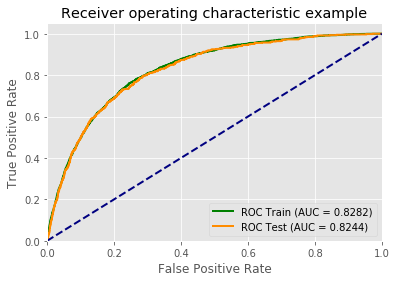

In [96]:
# print model results
get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)

Text(0.5, 257.44, 'Predicted label')

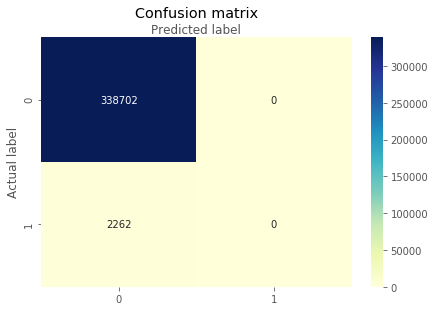

In [97]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_train, y_train_pred)
cnf_matrix

# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#### Understanding the Estimated Coefficients

In [99]:
clf_lr_liblinear.intercept_

array([0.59898185])

In [100]:
df_coeffs = pd.DataFrame(list(zip(X, clf_lr_liblinear.coef_.flatten()))).sort_values(by=[1], ascending=False)
df_coeffs.columns = ['feature', 'coeff']
df_coeffs

,feature,coeff
5,NUM_BO_1,9.449926e-01
23,OCC_STAT_P,6.484129e-01
0,ORIG_RT,5.902360e-01
13,FTHB_FLG_Y,4.784858e-01
25,RELOCATION_FLG_N,3.611629e-01
21,PROP_TYP_SF,3.243826e-01
12,FTHB_FLG_N,2.926431e-01
10,ORIG_CHN_C,2.401333e-01
20,PROP_TYP_PU,1.420333e-01
9,ORIG_CHN_B,1.279865e-01


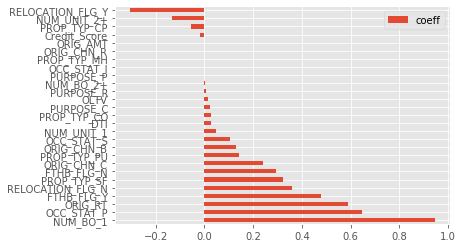

In [101]:
ax = df_coeffs.plot.barh()
t = np.arange(X.shape[1])
ax.set_yticks(t)
ax.set_yticklabels(df_coeffs['feature'])
plt.show()

# Logistic Regression model using sklearn with solver = 'lbfgs'

C:\Users\rhoda\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rhoda\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              train      test
metrics                      
AUC        0.778287  0.779948
Accuracy   0.993366  0.993137
Precision  0.000000  0.000000
Recall     0.000000  0.000000
f1-score   0.000000  0.000000


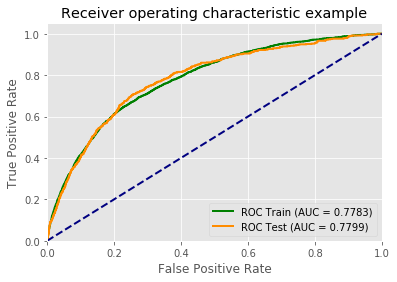

In [102]:
# solver = 'lbfgs' only suppurt penalty='l2' regualation 
lr_lbsf = LogisticRegression(solver = 'lbfgs', C=1.0, penalty='l2')

clf_lr_lbsf = lr_lbsf.fit(X_train, y_train)

# Make prediction on the training data
y_train_pred = clf_lr_lbsf.predict(X_train)
p_train_pred = clf_lr_lbsf.predict_proba(X_train)[:,1]

# Make predictions on test data
y_test_pred = clf_lr_lbsf.predict(X_test)
p_test_pred = clf_lr_lbsf.predict_proba(X_test)[:,1]

# print model results
get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)

Text(0.5, 257.44, 'Predicted label')

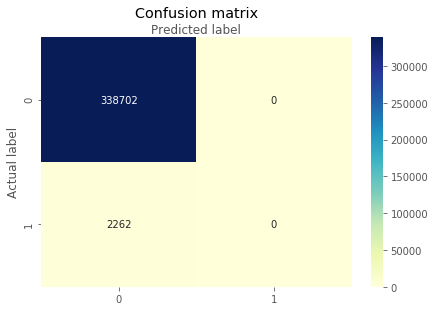

In [103]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_train, y_train_pred)
cnf_matrix

# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [104]:
clf_lr_lbsf.intercept_

array([0.00019733])

In [105]:
df_coeffs_1 = pd.DataFrame(list(zip(X, clf_lr_lbsf.coef_.flatten()))).sort_values(by=[1], ascending=False)
df_coeffs_1.columns = ['feature', 'coeff']
df_coeffs_1

,feature,coeff
2,OLTV,0.042362
3,DTI,0.022156
0,ORIG_RT,0.002077
5,NUM_BO_1,0.001042
13,FTHB_FLG_Y,0.000608
23,OCC_STAT_P,0.000448
10,ORIG_CHN_C,0.000390
15,PURPOSE_P,0.000390
21,PROP_TYP_SF,0.000314
7,NUM_UNIT_1,0.000228


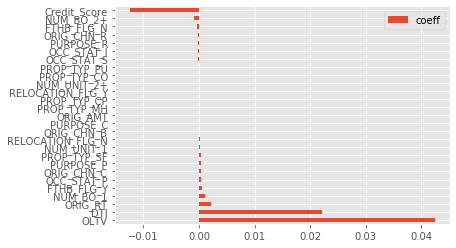

In [106]:
ax = df_coeffs_1.plot.barh()
t = np.arange(X.shape[1])
ax.set_yticks(t)
ax.set_yticklabels(df_coeffs_1['feature'])
plt.show()

# Logistic Regression model using sklearn with solver = 'saga'

### The SAGA solver is a variant of SAG that also supports the non-smooth penalty=l1 option (i.e. L1 Regularization). This is therefore the solver of choice for sparse multinomial logistic regression and it’s also suitable very Large dataset. Side note: According to Scikit Documentation: The SAGA solver is often the best choice. However, dataset needs to be normalized before using saga

In [75]:
lr_saga = LogisticRegression(solver = 'saga')
clf_lr_saga = lr_saga.fit(X_train, y_train)

C:\Users\rhoda\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


C:\Users\rhoda\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rhoda\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              train      test
metrics                      
AUC        0.560381  0.540462
Accuracy   0.993366  0.993137
Precision  0.000000  0.000000
Recall     0.000000  0.000000
f1-score   0.000000  0.000000


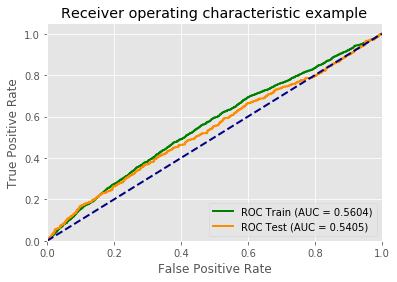

In [76]:
# Make prediction on the training data
y_train_pred = clf_lr_saga.predict(X_train)
p_train_pred = clf_lr_saga.predict_proba(X_train)[:,1]

# Make predictions on test data
y_test_pred = clf_lr_saga.predict(X_test)
p_test_pred = clf_lr_saga.predict_proba(X_test)[:,1]

# print model results
get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)

## Weighted Logistic Regression with Scikit_learn

In [77]:
# weighted Logistic Regression with Scikit_learn
weights = {0:1.0, 1:100} 
lr_weighted = LogisticRegression(solver='lbfgs', class_weight=weights) 
lr_weighted.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight={0: 1.0, 1: 100}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [78]:
X_train.head

<bound method NDFrame.head of         ORIG_RT  ORIG_AMT  OLTV   DTI  Credit_Score  NUM_BO_1  NUM_BO_2+  \
173435    4.500    309000    77  50.0         809.0         1          0   
181681    4.375    502000    79  36.0         792.0         1          0   
374887    4.250    324000    90  28.0         721.0         0          1   
369931    3.750    200000    79  26.0         801.0         1          0   
417349    5.250    223000    79  46.0         682.0         1          0   
...         ...       ...   ...   ...           ...       ...        ...   
359784    4.250    226000    86  34.0         770.0         1          0   
358084    3.875    202000    72  18.0         799.0         1          0   
152315    3.990    179000    85  42.0         788.0         1          0   
117952    4.250    217000    65  38.0         691.0         0          1   
305712    4.250    578000    68  47.0         767.0         0          1   

        NUM_UNIT_1  NUM_UNIT_2+  ORIG_CHN_B  ...  PROP_TY

In [79]:
# Make prediction on the training data
y_train_pred_1 = lr_weighted.predict(X_train)
y_train_proba_1 = lr_weighted.predict_proba(X_train)[:,1]
# Make predictions on test data
y_test_pred_1 = lr_weighted.predict(X_test)
y_test_proba_1 = lr_weighted.predict_proba(X_test)[:,1]

              train      test
metrics                      
AUC        0.818992  0.819482
Accuracy   0.811564  0.809868
Precision  0.022949  0.023836
Recall     0.659151  0.668376
f1-score   0.044354  0.046030


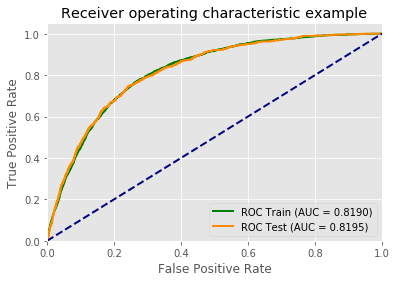

In [80]:
# print model results
get_performance_metrics(y_train, y_train_proba_1, y_test, y_test_proba_1)
plot_roc_curve(y_train, y_train_proba_1, y_test, y_test_proba_1)

Text(0.5, 257.44, 'Predicted label')

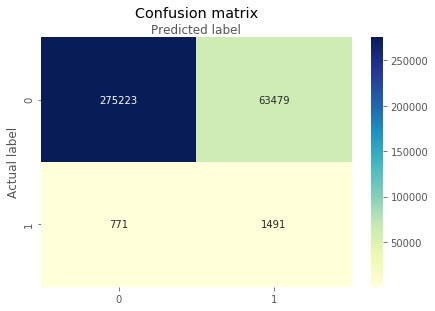

In [81]:

from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_train, y_train_pred_1)
cnf_matrix

# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Understanding the Estimated Coefficients of weighted Logistic Regression 

In [82]:
lr_weighted.intercept_

array([0.11488687])

In [83]:
df_coeffs_1 = pd.DataFrame(list(zip(X, lr_weighted.coef_.flatten()))).sort_values(by=[1], ascending=False)
df_coeffs_1.columns = ['feature', 'coeff']
df_coeffs_1

,feature,coeff
0,ORIG_RT,9.873949e-01
5,NUM_BO_1,6.048965e-01
14,PURPOSE_C,3.115016e-01
21,PROP_TYP_SF,2.671803e-01
23,OCC_STAT_P,2.245478e-01
25,RELOCATION_FLG_N,1.244718e-01
10,ORIG_CHN_C,1.151626e-01
7,NUM_UNIT_1,1.122818e-01
12,FTHB_FLG_N,7.270414e-02
13,FTHB_FLG_Y,4.218271e-02


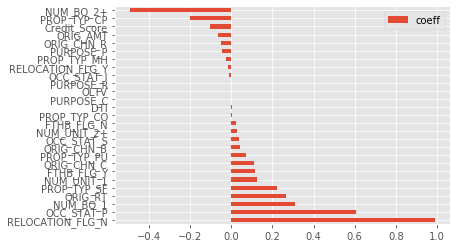

In [84]:
ax = df_coeffs_1.plot.barh()
t = np.arange(X.shape[1])
ax.set_yticks(t)
ax.set_yticklabels(df_coeffs['feature'])
plt.show()

## Bagging

### Single Tree

C:\Users\rhoda\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              train      test
metrics                      
AUC        0.985201  0.552094
Accuracy   0.993372  0.993137
Precision  0.583333  0.000000
Recall     0.003095  0.000000
f1-score   0.006157  0.000000


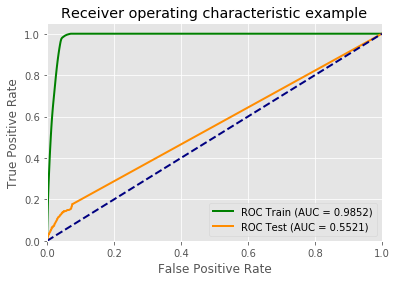

In [90]:
from sklearn.tree import DecisionTreeClassifier
Single_Tree = DecisionTreeClassifier(max_depth=20,min_samples_leaf=10)

# Fit a model by providing X and y from training set
Single_Tree.fit(X_train, y_train)

# Make prediction on the training data
y_train_pred = Single_Tree.predict(X_train)
p_train_pred = Single_Tree.predict_proba(X_train)[:,1]

# Make predictions on test data
y_test_pred = Single_Tree.predict(X_test)
p_test_pred = Single_Tree.predict_proba(X_test)[:,1]

# print model results
get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)

## define function to perform train, test, and get model performance

In [85]:

def train_test_model(clf, X_train, y_train, X_test, y_test):
    # Fit a model by providing X and y from training set
    clf.fit(X_train, y_train)

    # Make prediction on the training data
    y_train_pred = clf.predict(X_train)
    p_train_pred = clf.predict_proba(X_train)[:,1]

    # Make predictions on test data
    y_test_pred = clf.predict(X_test)
    p_test_pred = clf.predict_proba(X_test)[:,1]

    # print model results
    get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
    plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)


## Bagged Trees

C:\Users\rhoda\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rhoda\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              train      test
metrics                      
AUC        0.997195  0.780723
Accuracy   0.993366  0.993137
Precision  0.000000  0.000000
Recall     0.000000  0.000000
f1-score   0.000000  0.000000


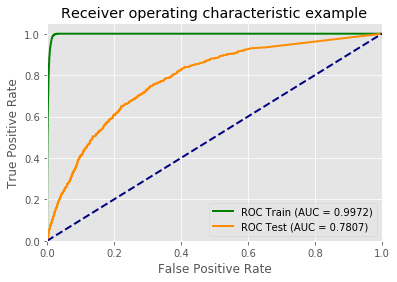

In [93]:
from sklearn.ensemble import BaggingClassifier

base_classifier = DecisionTreeClassifier(max_depth=20,min_samples_leaf=10)

# Choose some parameter combinations to try
parameters = {
              'base_estimator':base_classifier,
              'n_estimators': 50,
              'n_jobs': -1
              }

clf = BaggingClassifier(**parameters)

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

## Single KNN

              train      test
metrics                      
AUC        0.993803  0.521336
Accuracy   0.993507  0.992914
Precision  0.671429  0.000000
Recall     0.041556  0.000000
f1-score   0.078268  0.000000


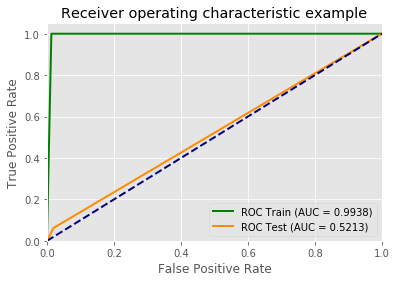

In [94]:
from sklearn.neighbors import KNeighborsClassifier
parameters = {
    #'weights':'distance',
    'n_neighbors':3,
    'leaf_size':10
}
base_classifier = KNeighborsClassifier(**parameters)
clf = base_classifier

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

## Bagged KNN

C:\Users\rhoda\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


              train      test
metrics                      
AUC        0.998223  0.548408
Accuracy   0.993574  0.992926
Precision  0.865979  0.000000
Recall     0.037135  0.000000
f1-score   0.071217  0.000000


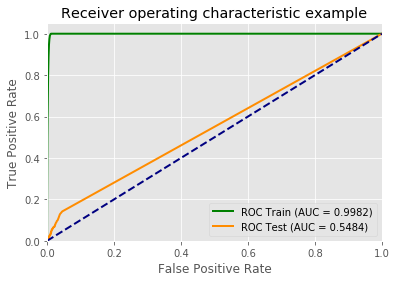

In [95]:
from sklearn.ensemble import BaggingClassifier

# Choose some parameter combinations to try
parameters = {
              'base_estimator':base_classifier,
              'n_estimators': 30,
              'n_jobs': -1
              }

clf = BaggingClassifier(**parameters)

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

## Random Forest

C:\Users\rhoda\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rhoda\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              train      test
metrics                      
AUC        0.977224  0.819582
Accuracy   0.993366  0.993137
Precision  0.000000  0.000000
Recall     0.000000  0.000000
f1-score   0.000000  0.000000


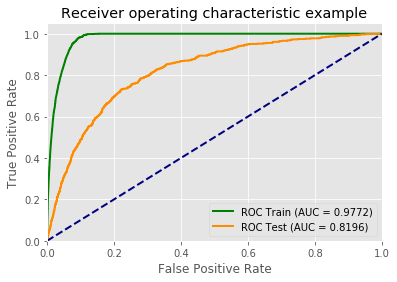

In [86]:
from sklearn.ensemble import RandomForestClassifier

# Choose some parameter combinations to try
parameters = {'n_estimators': 50,
              'max_features': 'auto',
              'criterion': 'gini',
              'max_depth': 20,
              'min_samples_split': 2,
              'min_samples_leaf': 20,
              'random_state': 0,
              'n_jobs': -1
              }

clf_rf = RandomForestClassifier(**parameters)

# Fit a model by providing X and y from training set
clf_rf.fit(X_train, y_train)

# Train test model
train_test_model(clf_rf, X_train, y_train, X_test, y_test)

## Gradient Boosting Trees

              train      test
metrics                      
AUC        0.865428  0.821470
Accuracy   0.993539  0.992926
Precision  0.864198  0.050000
Recall     0.030946  0.001709
f1-score   0.059752  0.003306


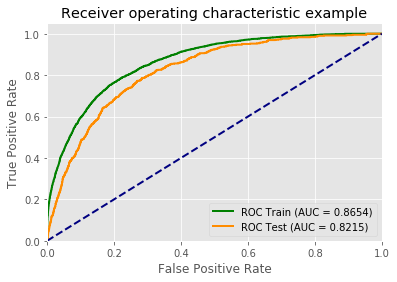

In [87]:
from sklearn.ensemble import GradientBoostingClassifier

# Choose some parameter combinations to try
parameters = {
    'n_estimators': 50,
    'max_depth': 5,
    'learning_rate': 0.2,
    'random_state': 42
}

# parameters = {
#     'n_estimators': 50,
#     'max_depth': 5,
#     'learning_rate': 0.2,
#     'subsample': 0.7,
#     'max_features':0.8,
#     'random_state': 42
# }

clf_gb = GradientBoostingClassifier(**parameters)

# Train test model
train_test_model(clf_gb, X_train, y_train, X_test, y_test)

              train      test
metrics                      
AUC        0.860676  0.828928
Accuracy   0.993436  0.993055
Precision  0.785714  0.000000
Recall     0.014589  0.000000
f1-score   0.028646  0.000000


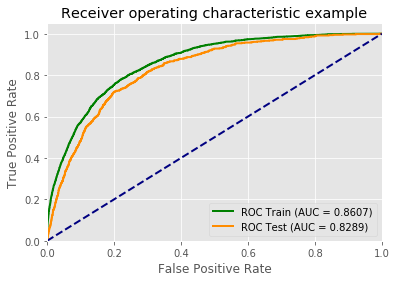

In [99]:
# Choose some parameter combinations to try
parameters = {
    'n_estimators': 50,
    'max_depth': 5,
    'learning_rate': 0.1,
    'random_state': 42
}

# parameters = {
#     'n_estimators': 50,
#     'max_depth': 5,
#     'learning_rate': 0.2,
#     'subsample': 0.7,
#     'max_features':0.8,
#     'random_state': 42
# }

clf = GradientBoostingClassifier(**parameters)

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

              train      test
metrics                      
AUC        0.858145  0.830182
Accuracy   0.993454  0.993020
Precision  0.875000  0.083333
Recall     0.015473  0.001709
f1-score   0.030408  0.003350


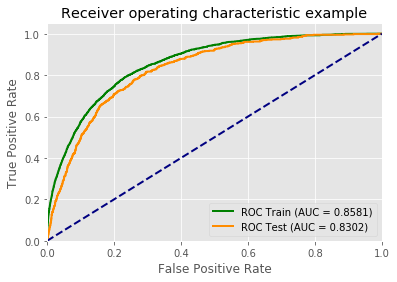

In [101]:
# Choose some parameter combinations to try
parameters = {
    'n_estimators': 50,
    'max_depth': 5,
    'learning_rate': 0.1,
    'subsample': 0.9,
    'max_features':0.8,
    'random_state': 42
}


clf = GradientBoostingClassifier(**parameters)

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

              train      test
metrics                      
AUC        0.858594  0.832785
Accuracy   0.993416  0.992938
Precision  0.654545  0.052632
Recall     0.015915  0.001709
f1-score   0.031075  0.003311


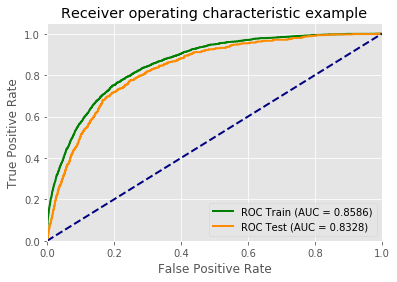

In [89]:
from sklearn.ensemble import GradientBoostingClassifier

# Choose some parameter combinations to try
parameters = {
    'n_estimators': 50,
    'max_depth': 5,
    'learning_rate': 0.1,
    'subsample': 0.7,
    'max_features':0.8,
    'random_state': 42
}


clf_gb = GradientBoostingClassifier(**parameters)

# Train test model
train_test_model(clf_gb, X_train, y_train, X_test, y_test)

## Neural Network 

In [90]:
from sklearn.neural_network import MLPClassifier

C:\Users\rhoda\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rhoda\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              train      test
metrics                      
AUC        0.783030  0.782946
Accuracy   0.993366  0.993137
Precision  0.000000  0.000000
Recall     0.000000  0.000000
f1-score   0.000000  0.000000


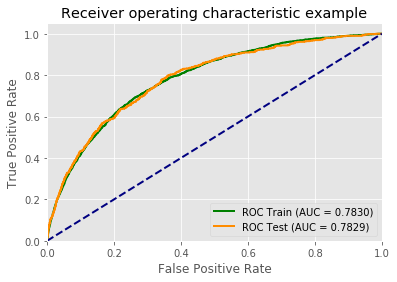

In [91]:
parameters = {
    'solver':'adam', 
    'activation':'relu',
    'alpha':1e-5,
    'hidden_layer_sizes':(5,5), 
    'learning_rate':'adaptive',
    'random_state':1
    }
clf_NN = MLPClassifier(**parameters)
train_test_model(clf_NN, X_train, y_train, X_test, y_test)

# SVM

## Linear SVM

C:\Users\rhoda\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\rhoda\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rhoda\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              train      test
metrics                      
AUC        0.500000  0.500000
Accuracy   0.993366  0.993137
Precision  0.000000  0.000000
Recall     0.000000  0.000000
f1-score   0.000000  0.000000


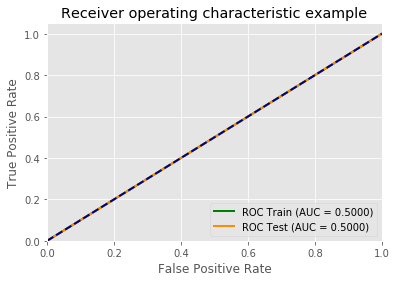

In [106]:
from sklearn.svm import LinearSVC

# Choose some parameter combinations to try
clf = LinearSVC()

# Fit a model by providing X and y from training set
clf.fit(X_train, y_train)

# No predict_proba for LinearSVC

# Make prediction on the training data
p_train_pred = clf.predict(X_train)

# Make predictions on test data
p_test_pred = clf.predict(X_test)

# print model results
get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)

## NonLinear SVM

C:\Users\rhoda\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\rhoda\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rhoda\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              train      test
metrics                      
AUC        0.440534  0.461521
Accuracy   0.993366  0.993137
Precision  0.000000  0.000000
Recall     0.000000  0.000000
f1-score   0.000000  0.000000


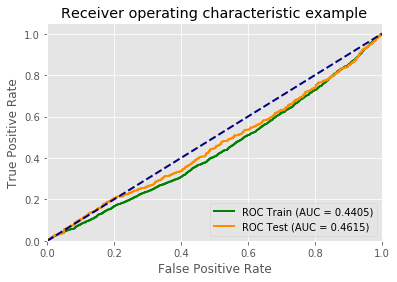

In [93]:
from sklearn.svm import SVC

# Choose some parameter combinations to try
parameters = {
    'probability':True, # get simulated probability
    'max_iter':2000
    }
clf_svm_NL = SVC(**parameters)    

# Train test model
train_test_model(clf_svm_NL, X_train, y_train, X_test, y_test)

# HyperParameter Tuning: Grid Search

C:\Users\rhoda\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              train      test
metrics                      
AUC        0.999988  0.782128
Accuracy   0.993383  0.993137
Precision  1.000000  0.000000
Recall     0.002653  0.000000
f1-score   0.005291  0.000000


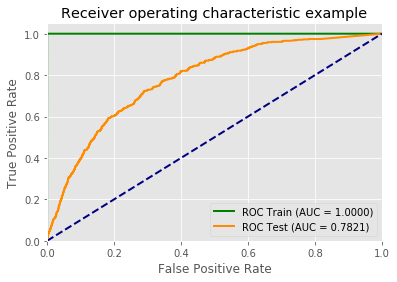

In [197]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score
from sklearn.model_selection import GridSearchCV

# Choose the type of classifier. 
clf_GS = RandomForestClassifier()

# Choose some parameter combinations to try
param_grid = {'n_estimators': [100,200], 
              'max_features': ['auto'], 
              'criterion': ['gini'],
              'max_depth': [15,20,25], 
              'min_samples_split': [2],
              'min_samples_leaf': [2,10,20],
              'n_jobs':[-1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(roc_auc_score)

# Run the grid search
# read theory
grid_obj = GridSearchCV(clf_GS, param_grid, cv=5, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf_GS = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf_GS.fit(X_train, y_train)

# Train test model
train_test_model(clf_GS, X_train, y_train, X_test, y_test)

# Model Validation 

## Logistic Regression with solver = 'liblinear'

In [67]:
import math

In [118]:
def prob(a):
    prob = 1 /(1+ math.exp(-a))
    return prob

# Fit a model by providing X and y from training set
lr = LogisticRegression(solver = 'liblinear',C=1.0, penalty='l1')
clf_lr_liblinear = lr.fit(X_train, y_train)

predict = X * clf_lr_liblinear.coef_

predict['prob'] = pd.DataFrame(clf_lr_liblinear.predict_proba(X))[1]

predict['self_cal'] = predict.apply(sum, axis = 1)
predict['self_cal'] = predict['self_cal']+float(clf_lr_liblinear.intercept_)
predict['self_cal'] = predict['self_cal'].apply(prob)

predict['Delq.Status_D90'] = y 

In [119]:
predict

,ORIG_RT,ORIG_AMT,OLTV,DTI,Credit_Score,NUM_BO_1,NUM_BO_2+,NUM_UNIT_1,NUM_UNIT_2+,ORIG_CHN_B,...,PROP_TYP_PU,PROP_TYP_SF,OCC_STAT_I,OCC_STAT_P,OCC_STAT_S,RELOCATION_FLG_N,RELOCATION_FLG_Y,prob,self_cal,Delq.Status_D90
0,2.393875,-0.230864,1.082846,0.798857,-14.461833,0.969564,0.000000,0.299581,0.0,0.000000,...,0.138468,0.000000,0.0,0.612416,0.0,1.055452,0.0,0.000954,0.000955,0
1,2.393875,-0.135562,1.332733,1.169755,-13.456269,0.000000,0.021962,0.299581,0.0,0.000000,...,0.138468,0.000000,0.0,0.612416,0.0,1.055452,0.0,0.002576,0.002583,0
2,2.247426,-0.118745,1.316074,1.369470,-12.158178,0.000000,0.021962,0.299581,0.0,0.000000,...,0.000000,0.319812,0.0,0.612416,0.0,1.055452,0.0,0.009310,0.009396,0
3,2.393875,-0.093773,1.332733,1.369470,-14.023042,0.969564,0.000000,0.299581,0.0,0.000000,...,0.138468,0.000000,0.0,0.612416,0.0,1.055452,0.0,0.004507,0.004527,0
4,2.393875,-0.123331,0.816299,0.627674,-13.291723,0.969564,0.000000,0.299581,0.0,0.000000,...,0.000000,0.319812,0.0,0.612416,0.0,1.055452,0.0,0.002591,0.002598,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426201,2.393875,-0.057589,1.032868,0.427959,-13.200308,0.000000,0.021962,0.299581,0.0,0.000000,...,0.000000,0.319812,0.0,0.612416,0.0,1.055452,0.0,0.005965,0.001204,0
426202,2.112243,-0.162063,1.582621,1.255347,-13.657382,0.969564,0.000000,0.299581,0.0,0.130255,...,0.138468,0.000000,0.0,0.612416,0.0,1.055452,0.0,0.007789,0.006011,0
426203,2.253059,-0.090715,1.332733,1.340939,-13.364855,0.969564,0.000000,0.299581,0.0,0.000000,...,0.138468,0.000000,0.0,0.612416,0.0,1.055452,0.0,0.000946,0.007796,0
426204,2.393875,-0.065233,0.999550,1.055633,-14.023042,0.000000,0.021962,0.299581,0.0,0.000000,...,0.000000,0.319812,0.0,0.612416,0.0,1.055452,0.0,0.001973,0.000948,0


In [120]:
val_lr_liblinear = pd.concat([X,predict.iloc[:,-3:]],axis = 1)

In [121]:
val_lr_liblinear

,ORIG_RT,ORIG_AMT,OLTV,DTI,Credit_Score,NUM_BO_1,NUM_BO_2+,NUM_UNIT_1,NUM_UNIT_2+,ORIG_CHN_B,...,PROP_TYP_PU,PROP_TYP_SF,OCC_STAT_I,OCC_STAT_P,OCC_STAT_S,RELOCATION_FLG_N,RELOCATION_FLG_Y,prob,self_cal,Delq.Status_D90
0,4.25,453000,65,28.0,791.0,1,0,1,0,0,...,1,0,0,1,0,1,0,0.000954,0.000955,0
1,4.25,266000,80,41.0,736.0,0,1,1,0,0,...,1,0,0,1,0,1,0,0.002576,0.002583,0
2,3.99,233000,79,48.0,665.0,0,1,1,0,0,...,0,1,0,1,0,1,0,0.009310,0.009396,0
3,4.25,184000,80,48.0,767.0,1,0,1,0,0,...,1,0,0,1,0,1,0,0.004507,0.004527,0
4,4.25,242000,49,22.0,727.0,1,0,1,0,0,...,0,1,0,1,0,1,0,0.002591,0.002598,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426201,4.25,113000,62,15.0,722.0,0,1,1,0,0,...,0,1,0,1,0,1,0,0.005965,0.001204,0
426202,3.75,318000,95,44.0,747.0,1,0,1,0,1,...,1,0,0,1,0,1,0,0.007789,0.006011,0
426203,4.00,178000,80,47.0,731.0,1,0,1,0,0,...,1,0,0,1,0,1,0,0.000946,0.007796,0
426204,4.25,128000,60,37.0,767.0,0,1,1,0,0,...,0,1,0,1,0,1,0,0.001973,0.000948,0


In [115]:
X.columns

Index(['ORIG_RT', 'ORIG_AMT', 'OLTV', 'DTI', 'Credit_Score', 'ORIG_CHN_B',
       'ORIG_CHN_C', 'ORIG_CHN_R', 'FTHB_FLG_N', 'FTHB_FLG_Y', 'PURPOSE_C',
       'PURPOSE_P', 'PURPOSE_R', 'PROP_TYP_CO', 'PROP_TYP_CP', 'PROP_TYP_MH',
       'PROP_TYP_PU', 'PROP_TYP_SF', 'OCC_STAT_I', 'OCC_STAT_P', 'OCC_STAT_S',
       'RELOCATION_FLG_N', 'RELOCATION_FLG_Y', 'NUM_UNIT_1', 'NUM_UNIT_2+',
       'NUM_BO_1', 'NUM_BO_2+'],
      dtype='object')

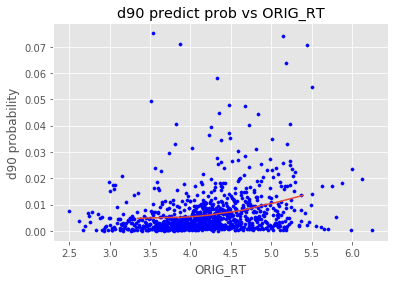

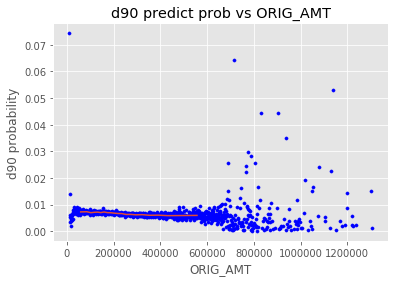

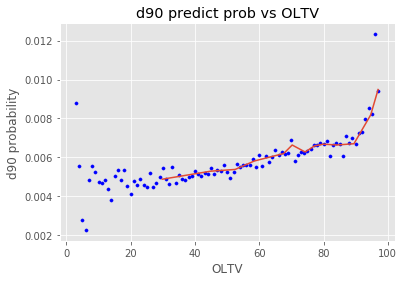

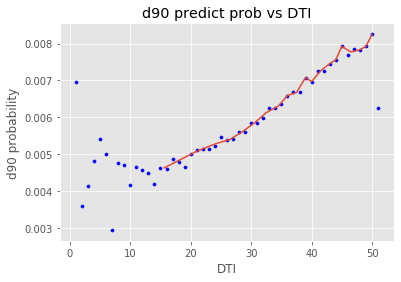

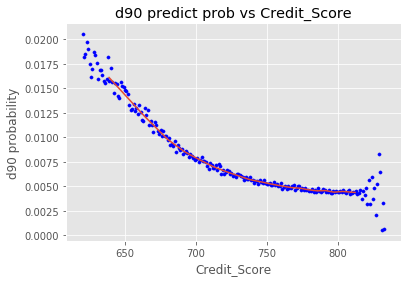

In [123]:
continius = ['ORIG_RT', 'ORIG_AMT', 'OLTV','DTI', 'Credit_Score']
for col in continius:
    plt.subplot(111)
    a = val_lr_liblinear.groupby(pd.qcut(val_lr_liblinear[col],20,duplicates = 'drop'))[[col, 'prob']].mean()
    plt.plot(a[col],a['prob'])

    b = val_lr_liblinear.groupby([col],as_index=False)[['prob']].mean()
    plt.scatter(b[col],b['prob'],color='blue', s=10)
    #plt.savefig("figs/bivariate_analysis/count_vs_" + col + ".png")
    plt.title("d90 predict prob vs " + col)
    plt.xlabel(col, fontsize =12)
    plt.ylabel('d90 probability',fontsize =12)
    plt.show()

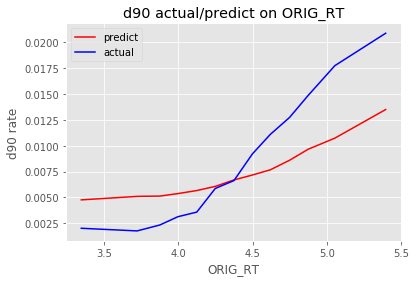

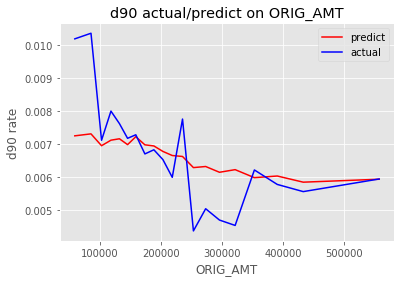

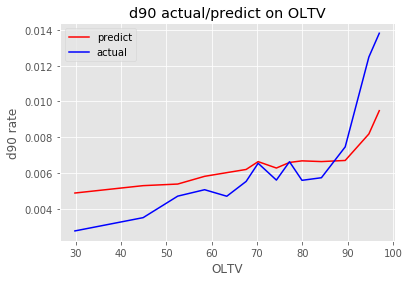

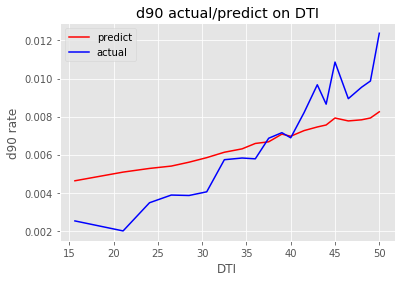

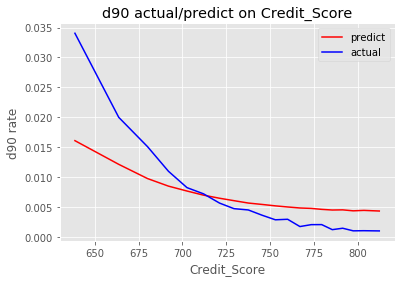

In [124]:
continius = ['ORIG_RT', 'ORIG_AMT', 'OLTV','DTI', 'Credit_Score']
for col in continius:
    plt.subplot(111)
    a = val_lr_liblinear.groupby(pd.qcut(val_lr_liblinear[col],20,duplicates = 'drop'))[[col, 'prob']].mean()
    plt.plot(a[col],a['prob'], c= 'r', label='predict')

    b = val_lr_liblinear.groupby(pd.qcut(val_lr_liblinear[col],20,duplicates = 'drop'))[[col, 'Delq.Status_D90']].mean()
    plt.plot(b[col],b['Delq.Status_D90'], c= 'b', label = 'actual')
    
    #plt.savefig("figs/bivariate_analysis/count_vs_" + col + ".png")
    plt.title("d90 actual/predict on " + col)
    plt.legend()
    plt.xlabel(col, fontsize =12)
    plt.ylabel('d90 rate',fontsize =12)
    plt.show()

## Logistic Regression with solver = 'lbfgs'

In [126]:
def prob(a):
    prob = 1 / (1 + math.exp(-a))
    return prob

predict = X * clf_lr_lbsf.coef_

predict['prob'] = pd.DataFrame(clf_lr_lbsf.predict_proba(X))[1]

predict['self_cal'] = predict.apply(sum, axis = 1)
predict['self_cal'] = predict['self_cal']+float(clf_lr_lbsf.intercept_)
predict['self_cal'] = predict['self_cal'].apply(prob)

predict['Delq.Status_D90'] = y

In [127]:
val_lr_lbsf = pd.concat([X,predict.iloc[:,-3:]],axis = 1)

In [128]:
val_lr_lbsf

,ORIG_RT,ORIG_AMT,OLTV,DTI,Credit_Score,NUM_BO_1,NUM_BO_2+,NUM_UNIT_1,NUM_UNIT_2+,ORIG_CHN_B,...,PROP_TYP_PU,PROP_TYP_SF,OCC_STAT_I,OCC_STAT_P,OCC_STAT_S,RELOCATION_FLG_N,RELOCATION_FLG_Y,prob,self_cal,Delq.Status_D90
0,4.25,453000,65,28.0,791.0,1,0,1,0,0,...,1,0,0,1,0,1,0,0.000994,0.000995,0
1,4.25,266000,80,41.0,736.0,0,1,1,0,0,...,1,0,0,1,0,1,0,0.006053,0.006090,0
2,3.99,233000,79,48.0,665.0,0,1,1,0,0,...,0,1,0,1,0,1,0,0.016734,0.017012,0
3,4.25,184000,80,48.0,767.0,1,0,1,0,0,...,1,0,0,1,0,1,0,0.005298,0.005326,0
4,4.25,242000,49,22.0,727.0,1,0,1,0,0,...,0,1,0,1,0,1,0,0.001235,0.001237,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426201,4.25,113000,62,15.0,722.0,0,1,1,0,0,...,0,1,0,1,0,1,0,0.010037,0.002270,0
426202,3.75,318000,95,44.0,747.0,1,0,1,0,1,...,1,0,0,1,0,1,0,0.008115,0.010118,0
426203,4.00,178000,80,47.0,731.0,1,0,1,0,0,...,1,0,0,1,0,1,0,0.001895,0.008130,0
426204,4.25,128000,60,37.0,767.0,0,1,1,0,0,...,0,1,0,1,0,1,0,0.004749,0.001904,0


## Weighted Logistic Regression 

In [129]:
def prob(a):
    prob = 1 / (1 + math.exp(-a))
    return prob

predict = X * lr_weighted.coef_

predict['prob'] = pd.DataFrame(lr_weighted.predict_proba(X))[1]

predict['self_cal'] = predict.apply(sum, axis = 1)
predict['self_cal'] = predict['self_cal']+float(lr_weighted.intercept_)
predict['self_cal'] = predict['self_cal'].apply(prob)

predict['d90_flag'] = y

In [130]:
val_logweighted = pd.concat([X,predict.iloc[:,-3:]],axis = 1)

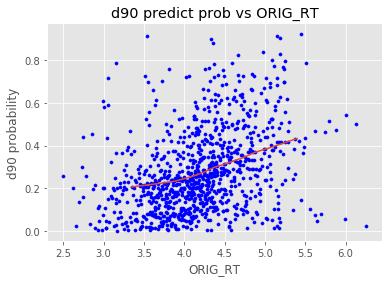

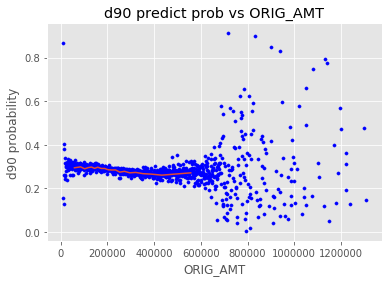

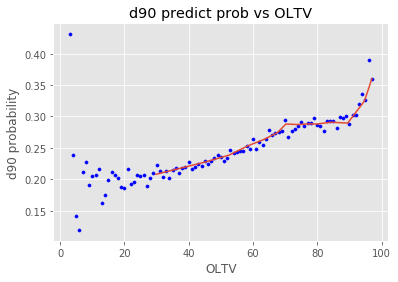

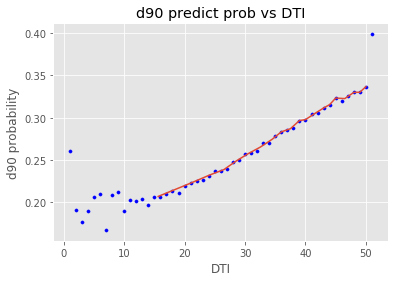

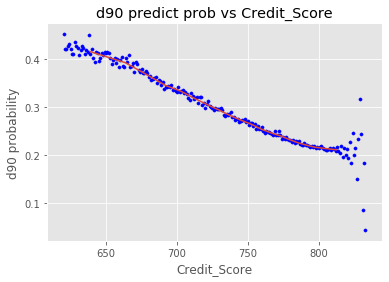

In [132]:
continius = ['ORIG_RT', 'ORIG_AMT', 'OLTV','DTI', 'Credit_Score']
for col in continius:
    plt.subplot(111)
    a = val_logweighted.groupby(pd.qcut(val_logweighted[col],20,duplicates = 'drop'))[[col, 'prob']].mean()
    plt.plot(a[col],a['prob'])

    b = val_logweighted.groupby([col],as_index=False)[['prob']].mean()
    plt.scatter(b[col],b['prob'],color='blue', s=10)
    #plt.savefig("figs/bivariate_analysis/count_vs_" + col + ".png")
    plt.title("d90 predict prob vs " + col)
    plt.xlabel(col, fontsize =12)
    plt.ylabel('d90 probability',fontsize =12)
    plt.show()

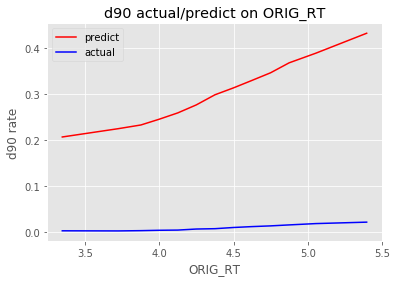

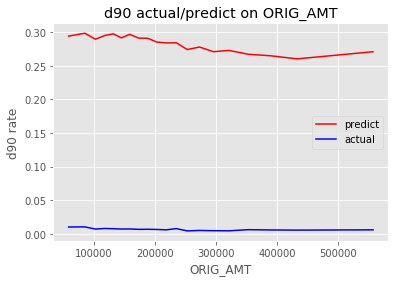

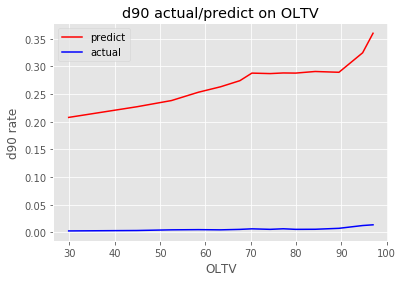

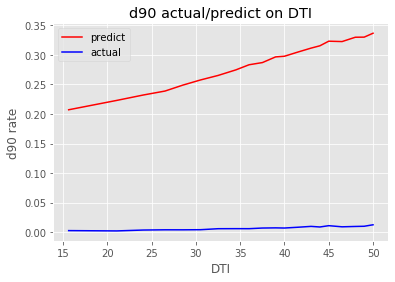

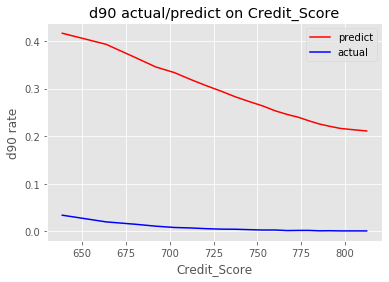

In [134]:
continius = ['ORIG_RT', 'ORIG_AMT', 'OLTV','DTI', 'Credit_Score']
for col in continius:
    plt.subplot(111)
    a = val_logweighted.groupby(pd.qcut(val_logweighted[col],20,duplicates = 'drop'))[[col, 'prob']].mean()
    plt.plot(a[col],a['prob'], c= 'r', label='predict')

    b = val_logweighted.groupby(pd.qcut(df[col],20,duplicates = 'drop'))[[col, 'd90_flag']].mean()
    plt.plot(b[col],b['d90_flag'], c= 'b', label = 'actual')
    
    #plt.savefig("figs/bivariate_analysis/count_vs_" + col + ".png")
    plt.title("d90 actual/predict on " + col)
    plt.legend()
    plt.xlabel(col, fontsize =12)
    plt.ylabel('d90 rate',fontsize =12)
    plt.show()

## Random Forest

In [129]:
val_rf = pd.concat([X,pd.DataFrame(clf_rf.predict_proba(X))[[1]]],axis = 1)
val_rf.rename(columns = {1:'prob'}, inplace = True)

## Gradient boost

In [131]:
val_gb = pd.concat([X,pd.DataFrame(clf_gb.predict_proba(X))[[1]]],axis = 1)
val_gb.rename(columns = {1:'prob'}, inplace = True)

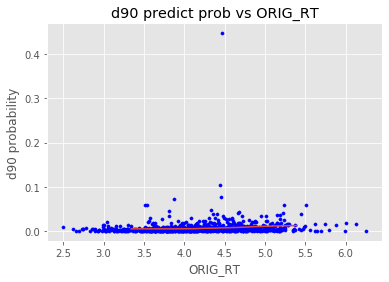

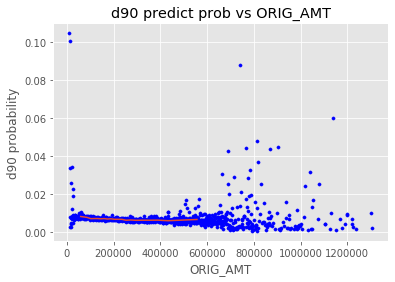

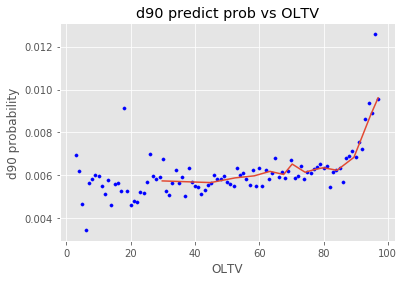

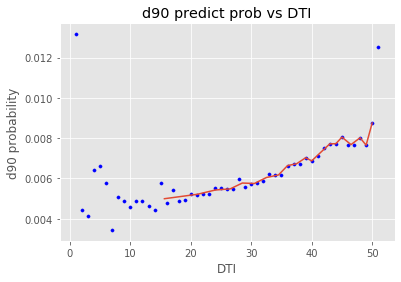

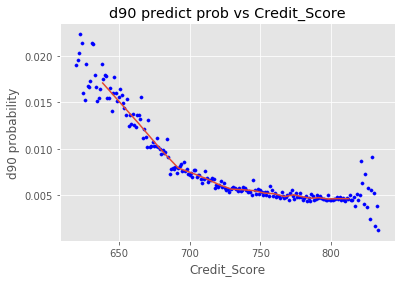

In [132]:
continius = ['ORIG_RT', 'ORIG_AMT', 'OLTV','DTI', 'Credit_Score']
for col in continius:
    plt.subplot(111)
    a = val_gb.groupby(pd.qcut(val_gb[col],20,duplicates = 'drop'))[[col, 'prob']].mean()
    plt.plot(a[col],a['prob'])

    b = val_gb.groupby([col],as_index=False)[['prob']].mean()
    plt.scatter(b[col],b['prob'],color='blue', s=10)
    #plt.savefig("figs/bivariate_analysis/count_vs_" + col + ".png")
    plt.title("d90 predict prob vs " + col)
    plt.xlabel(col, fontsize =12)
    plt.ylabel('d90 probability',fontsize =12)
    plt.show()

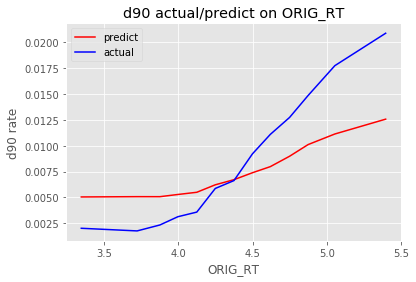

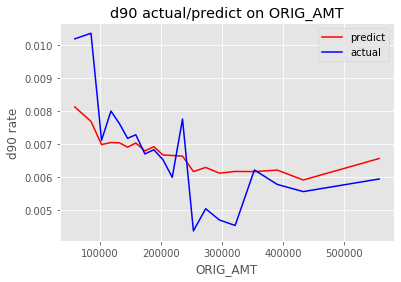

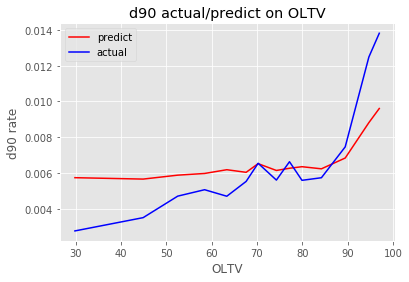

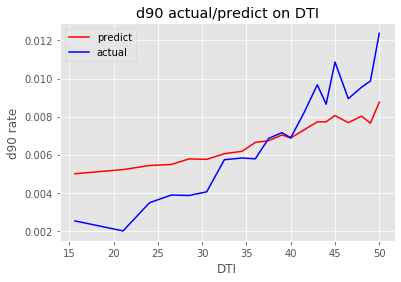

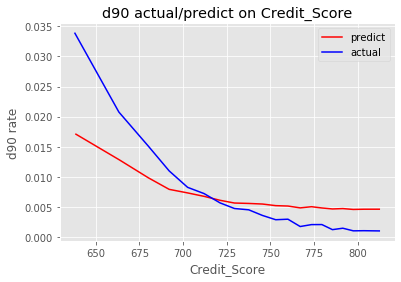

In [133]:
continius = ['ORIG_RT', 'ORIG_AMT', 'OLTV','DTI', 'Credit_Score']
for col in continius:
    plt.subplot(111)
    a = val_gb.groupby(pd.qcut(val_gb[col],20,duplicates = 'drop'))[[col, 'prob']].mean()
    plt.plot(a[col],a['prob'], c= 'r', label='predict')

    b =df.groupby(pd.qcut(df[col],20,duplicates = 'drop'))[[col, 'Delq.Status_D90']].mean()
    plt.plot(b[col],b['Delq.Status_D90'], c= 'b', label = 'actual')
    
    #plt.savefig("figs/bivariate_analysis/count_vs_" + col + ".png")
    plt.title("d90 actual/predict on " + col)
    plt.legend()
    plt.xlabel(col, fontsize =12)
    plt.ylabel('d90 rate',fontsize =12)
    plt.show()

# Put all model together to compare performance 

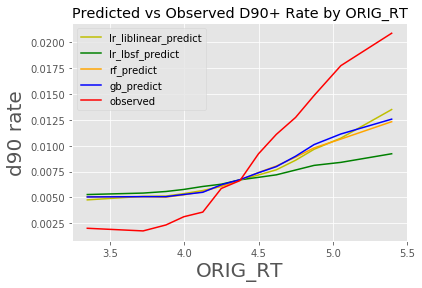

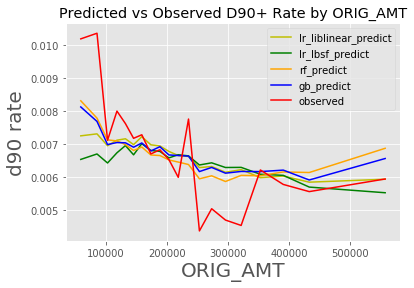

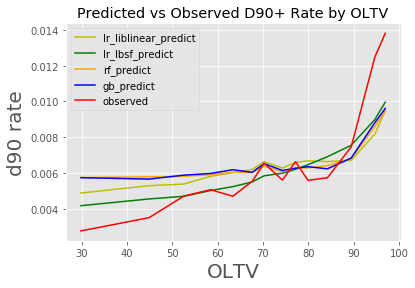

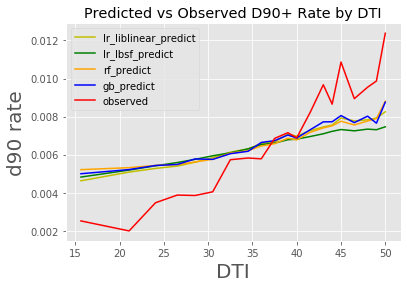

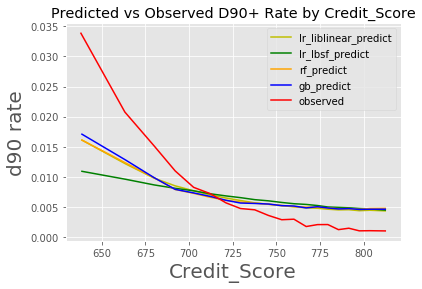

In [137]:
continius = ['ORIG_RT', 'ORIG_AMT', 'OLTV','DTI', 'Credit_Score']
for col in continius:
    plt.subplot(111)
    a = val_lr_liblinear.groupby(pd.qcut(val_lr_liblinear[col],20,duplicates = 'drop'))[[col, 'prob']].mean()
    plt.plot(a[col],a['prob'], c= 'y', label='lr_liblinear_predict')
    
    # if add weighted logistic model, then the image would not see difference of other models 
    c = val_lr_lbsf.groupby(pd.qcut(val_lr_lbsf[col],20,duplicates = 'drop'))[[col, 'prob']].mean()
    plt.plot(c[col],c['prob'], c= 'g', label='lr_lbsf_predict')
    
    d = val_rf.groupby(pd.qcut(val_rf[col],20,duplicates = 'drop'))[[col, 'prob']].mean()
    plt.plot(d[col],d['prob'], c= 'orange', label='rf_predict')
    
    e = val_gb.groupby(pd.qcut(val_gb[col],20,duplicates = 'drop'))[[col, 'prob']].mean()
    plt.plot(e[col],e['prob'], c= 'b', label='gb_predict')

    b = df.groupby(pd.qcut(df[col],20,duplicates = 'drop'))[[col, 'Delq.Status_D90']].mean()
    plt.plot(b[col],b['Delq.Status_D90'], c= 'r', label = 'observed')
    
    #plt.savefig("figs/bivariate_analysis/count_vs_" + col + ".png")
    plt.title("Predicted vs Observed D90+ Rate by " + col)
    plt.legend()
    plt.xlabel(col, fontsize =20)
    plt.ylabel('d90 rate',fontsize =20)
    plt.show()

## categorical varaibles validations

In [143]:
X_1 = X

In [144]:
X_1['Delq.Status_D90']= df['Delq.Status_D90']

In [145]:
def cat_prob(li):
    med = {}
    med['observed'] = []
    med['lr_liblinear'] = []
    med['lr_lbsf'] = []
    med['rf'] = []
    med['gb'] = []
    for i in li:
        med['observed'].append(X_1.groupby([i],as_index=False)[['Delq.Status_D90']].mean().iloc[1,1])
        med['lr_liblinear'].append(val_lr_liblinear[val_lr_liblinear[i]==1]['prob'].mean())
        med['lr_lbsf'].append(val_lr_lbsf[val_lr_lbsf[i]==1]['prob'].mean())
        med['rf'].append(val_rf[val_rf[i]==1]['prob'].mean()) 
        med['gb'].append(val_gb[val_gb[i]==1]['prob'].mean())
        
        
           
    df_med = pd.DataFrame(med, index=li) 
    
    plt.figure()
    df_med.plot(kind = 'bar',figsize = (10,5))
    plt.title("2018 Predicted vs Observed D90+ Rate by "+li[0][:-3])
    plt.ylabel('d90 rate',fontsize =12)
    plt.show()
    return 

In [139]:
category = [['ORIG_CHN_B', 'ORIG_CHN_C', 'ORIG_CHN_R'],['FTHB_FLG_N', 'FTHB_FLG_Y'],
            ['PURPOSE_C','PURPOSE_P', 'PURPOSE_R'], ['NUM_BO_1','NUM_BO_2+'],
            ['PROP_TYP_CO', 'PROP_TYP_CP', 'PROP_TYP_MH', 'PROP_TYP_PU', 'PROP_TYP_SF'],
            ['OCC_STAT_I', 'OCC_STAT_P', 'OCC_STAT_S'],['RELOCATION_FLG_N', 'RELOCATION_FLG_Y'],
            ['NUM_UNIT_1', 'NUM_UNIT_2+'],[ 'NUM_BO_1', 'NUM_BO_2+']]

<Figure size 432x288 with 0 Axes>

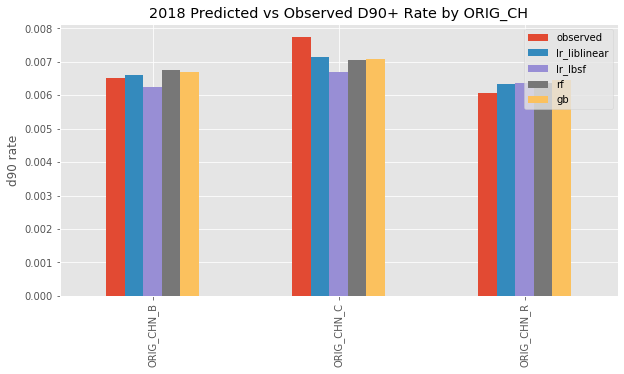

<Figure size 432x288 with 0 Axes>

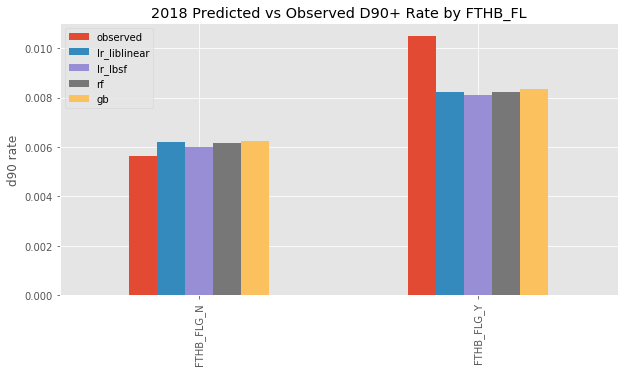

<Figure size 432x288 with 0 Axes>

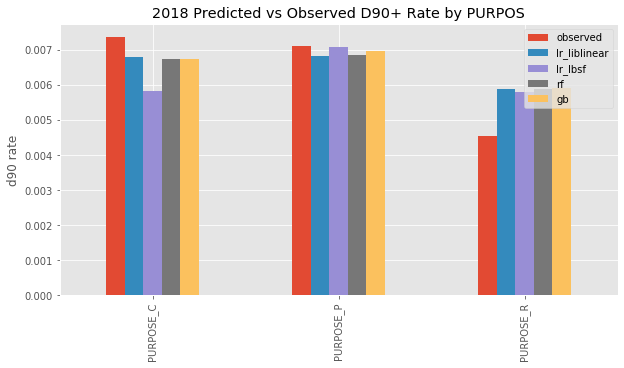

<Figure size 432x288 with 0 Axes>

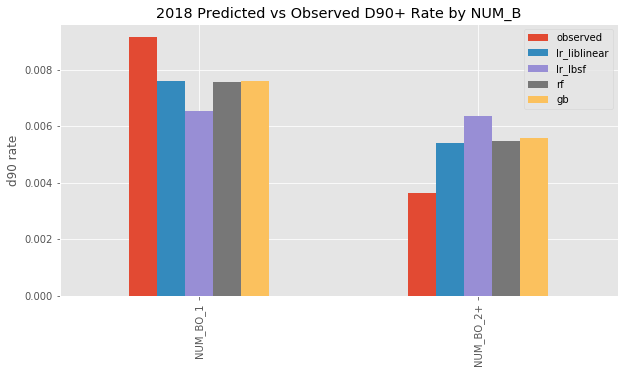

<Figure size 432x288 with 0 Axes>

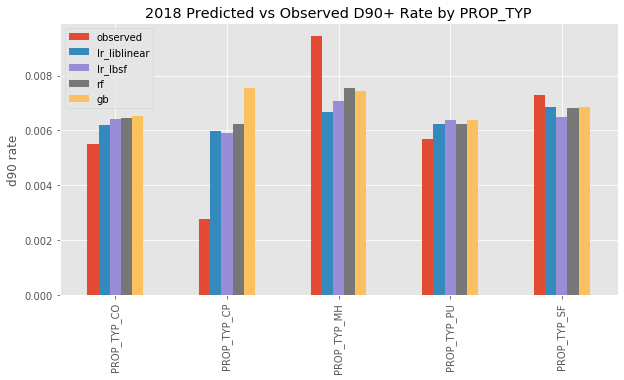

<Figure size 432x288 with 0 Axes>

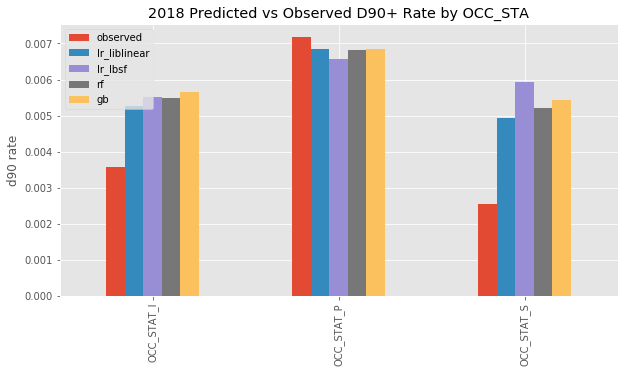

<Figure size 432x288 with 0 Axes>

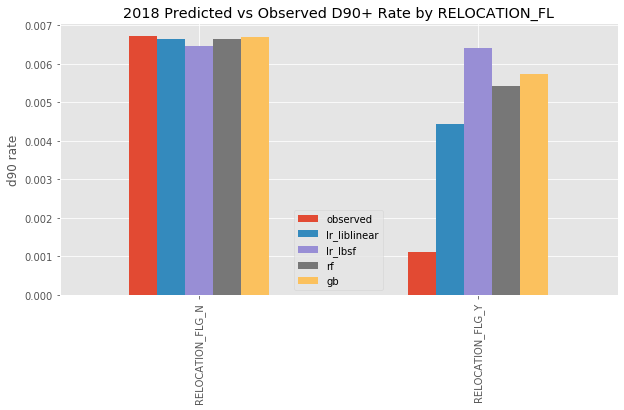

<Figure size 432x288 with 0 Axes>

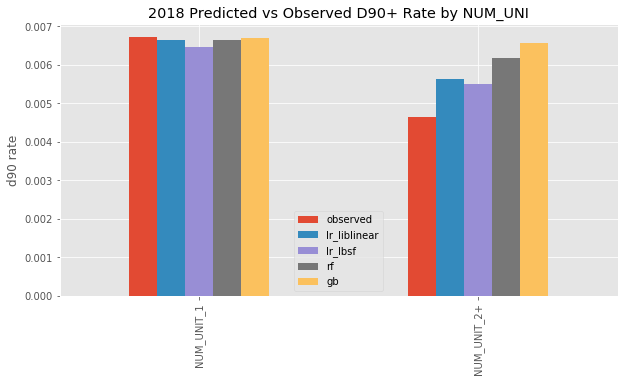

<Figure size 432x288 with 0 Axes>

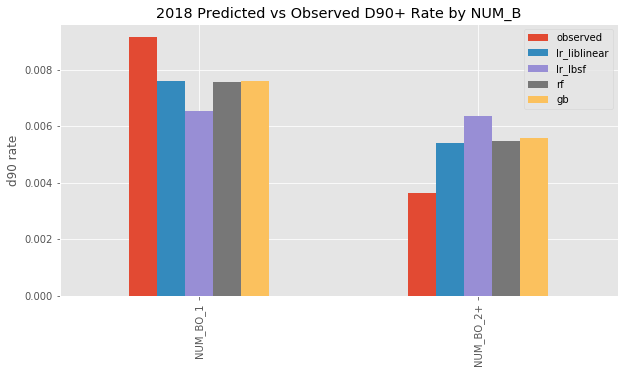

In [146]:
for li in category:
    cat_prob(li)

# Model Comparison

In [147]:
model_list={}

In [148]:
model_list['logit_liblinear '] = clf_lr_liblinear 

In [149]:
model_list['logit_lbsf'] = clf_lr_lbsf

In [150]:
model_list['random_forest'] = clf_rf

In [151]:
model_list['gradient_boost'] = clf_gb

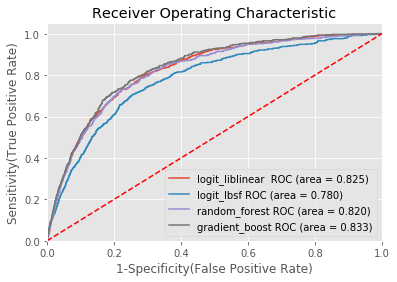

In [152]:
from sklearn import metrics
import matplotlib.pyplot as plt
plt.figure()

# Below for loop iterates through your models list
for name, model in model_list.items():
    a = X_test
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(a)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict_proba(a)[:,1])
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.3f)' % (name, auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

In [153]:
auc = pd.DataFrame()
for name, model in model_list.items():
    train_auc = metrics.roc_auc_score(y_train,model.predict_proba(X_train)[:,1])
    test_auc = metrics.roc_auc_score(y_test,model.predict_proba(X_test)[:,1])
    auc.at[name, "train_auc"] = '{0:.2f}'.format(train_auc)
    auc.at[name, "test_auc"] = '{0:.2f}'.format(test_auc)
auc


,train_auc,test_auc
logit_liblinear,0.83,0.82
logit_lbsf,0.78,0.78
random_forest,0.98,0.82
gradient_boost,0.86,0.83


# Prepare configuration for cross validation test harness

## prepare models
model_list


In [207]:
seed = 7

## evaluate each model in turn

In [209]:
from sklearn import model_selection
results = []
names = []
scoring = 'accuracy'
for name, model in model_list.items():
    kfold = model_selection.KFold(n_splits=10,random_state=seed,shuffle=True)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

logit_model: 0.993320 (0.000478)


C:\Users\rhoda\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


logit_weighted: 0.819305 (0.035121)
random_forest: 1.000000 (0.000000)
gradient_boost: 1.000000 (0.000000)


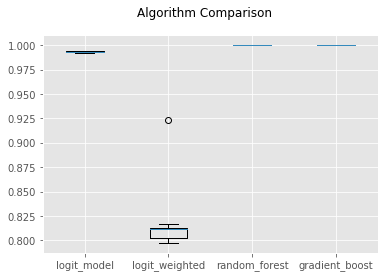

In [210]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Import  2016 dataset 

In [365]:
# Import two datesets 
colnames = ["LOAN_ID", "ORIG_CHN", "Seller.Name", "ORIG_RT", "ORIG_AMT", "ORIG_TRM", "ORIG_DTE","FRST_DTE", "OLTV", 
            "OCLTV", "NUM_BO", "DTI", "CSCORE_B", "FTHB_FLG", "PURPOSE", "PROP_TYP","NUM_UNIT", "OCC_STAT", 
            "STATE", "ZIP_3", "MI_PCT", "Product.Type", "CSCORE_C", "MI_TYPE", "RELOCATION_FLG"]
Data_2016 = pd.read_table('D:/1-Intern/Data/2016Q3/Acquisition_2016Q3.txt', 
                       sep = '|', header = None, names = colnames)

In [366]:
Data_2016.head

<bound method NDFrame.head of              LOAN_ID ORIG_CHN  \
0       100000040778        B   
1       100001486795        R   
2       100004186125        C   
3       100004379412        C   
4       100007687897        R   
...              ...      ...   
623478  999990481180        C   
623479  999991924268        R   
623480  999992373904        C   
623481  999997657918        C   
623482  999998432564        C   

                                              Seller.Name  ORIG_RT  ORIG_AMT  \
0       UNITED SHORE FINANCIAL SERVICES, LLC D/B/A UNI...    3.875    238000   
1                                                   OTHER    3.500    125000   
2                                  WELLS FARGO BANK, N.A.    3.625    136000   
3                                  WELLS FARGO BANK, N.A.    3.625    353000   
4                                                   OTHER    3.500    339000   
...                                                   ...      ...       ...   
623478       

In [368]:
CPR_2016 = pd.read_table('D:/1-Intern/Data/2016Q3/CPR.csv', sep = ',')

In [369]:
CPR_2016.head

<bound method NDFrame.head of           Unnamed: 0       LOAN_ID  ORIG_RT  ORIG_AMT  ORIG_TRM  \
0                  0  100000040778    3.875    238000       360   
1                  1  100000040778    3.875    238000       360   
2                  2  100000040778    3.875    238000       360   
3                  3  100000040778    3.875    238000       360   
4                  4  100000040778    3.875    238000       360   
...              ...           ...      ...       ...       ...   
23214337    23214337  999998432564    3.625    151000       360   
23214338    23214338  999998432564    3.625    151000       360   
23214339    23214339  999998432564    3.625    151000       360   
23214340    23214340  999998432564    3.625    151000       360   
23214341    23214341  999998432564    3.625    151000       360   

         Monthly.Rpt.Prd  LAST_RT   LAST_UPB  Zero.Bal.Code Delq.Status  
0             07/01/2016    3.875        NaN            NaN           0  
1             08/

In [371]:
CPR_2016.dtypes

Unnamed: 0           int64
LOAN_ID              int64
ORIG_RT            float64
ORIG_AMT             int64
ORIG_TRM             int64
Monthly.Rpt.Prd     object
LAST_RT            float64
LAST_UPB           float64
Zero.Bal.Code      float64
Delq.Status         object
dtype: object

In [372]:
# Convert string into datetime
from datetime import datetime
CPR_2016['Monthly.Rpt.Prd']= [datetime.strptime(x, '%m/%d/%Y') for x in CPR_2016.loc[:, 'Monthly.Rpt.Prd']]

In [376]:
df_long = CPR_2016.pivot('LOAN_ID','Monthly.Rpt.Prd','Delq.Status')

In [378]:
df_long = pd.DataFrame(df_long)

In [379]:
df_long 

Monthly.Rpt.Prd,2016-07-01,2016-08-01,2016-09-01,2016-10-01,2016-11-01,2016-12-01,2017-01-01,2017-02-01,2017-03-01,2017-04-01,...,2019-03-01,2019-04-01,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01,2019-10-01,2019-11-01,2019-12-01
LOAN_ID,,,,,,,,,,,,,,,,,,,,,
100000040778,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100001486795,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100004186125,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100004379412,NaN,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100007687897,NaN,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999990481180,NaN,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
999991924268,NaN,NaN,0,0,0,0,0,0,0,0,...,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
999992373904,NaN,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_long 

In [381]:
df_long.columns

DatetimeIndex(['2016-07-01', '2016-08-01', '2016-09-01', '2016-10-01',
               '2016-11-01', '2016-12-01', '2017-01-01', '2017-02-01',
               '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01',
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01', '2019-01-01', '2019-02-01',
               '2019-03-01', '2019-04-01', '2019-05-01', '2019-06-01',
               '2019-07-01', '2019-08-01', '2019-09-01', '2019-10-01',
               '2019-11-01', '2019-12-01'],
              dtype='datetime64[ns]', name='Monthly.Rpt.Prd', freq=None)

In [382]:
df_long.shape

(623483, 42)

## Subset dataset only contains before two year records

In [394]:
df_long_1 = df_long.iloc[:,0:25]

In [395]:
df_long_1.head

<bound method NDFrame.head of Monthly.Rpt.Prd 2016-07-01 2016-08-01 2016-09-01 2016-10-01 2016-11-01  \
LOAN_ID                                                                  
100000040778             0          0          0          0          0   
100001486795             0          0          0          0          0   
100004186125           NaN          0          0          0          0   
100004379412           NaN        NaN          0          0          0   
100007687897           NaN        NaN          0          0          0   
...                    ...        ...        ...        ...        ...   
999990481180           NaN        NaN          0          0          0   
999991924268           NaN        NaN          0          0          0   
999992373904           NaN        NaN          0          0          0   
999997657918           NaN          0          0          0          0   
999998432564           NaN        NaN          0          0          0   

Monthly

In [396]:
df_long_1.iloc[:,6].value_counts()

0    613914
1      1963
X      1599
2       160
3        78
4        61
5        30
6         7
7         1
Name: 2017-01-01 00:00:00, dtype: int64

In [397]:
df_long_1.iloc[:,3].value_counts()

0    618510
1      2526
X      1232
2       137
3        33
4         3
Name: 2016-10-01 00:00:00, dtype: int64

In [421]:
for (x, y) in df_long_1.iteritems():
    df_long_1[x] = df_long_1[x].replace(['1','2','X'], 0)
    df_long_1[x] = df_long_1[x].replace(['3','4','5','6','7','8','9','10','11','12',
                                         '13','14','15','16','17','18','19','20','21','22'], 1)
    df_long_1['Delq.Status_D90']= apply(lambda x: )

C:\Users\rhoda\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\rhoda\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [422]:
df_long_1.iloc[:,12].value_counts()

0    602790
0       349
Name: 2017-07-01 00:00:00, dtype: int64

In [419]:
df_long_1.iloc[:,12]

LOAN_ID
100000040778    0
100001486795    0
100004186125    0
100004379412    0
100007687897    0
               ..
999990481180    0
999991924268    0
999992373904    0
999997657918    0
999998432564    0
Name: 2017-07-01 00:00:00, Length: 623483, dtype: object

In [423]:
df_long_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 623483 entries, 100000040778 to 999998432564
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   2016-07-01 00:00:00  181470 non-null  object 
 1   2016-08-01 00:00:00  385086 non-null  object 
 2   2016-09-01 00:00:00  623143 non-null  object 
 3   2016-10-01 00:00:00  622441 non-null  object 
 4   2016-11-01 00:00:00  621210 non-null  object 
 5   2016-12-01 00:00:00  619622 non-null  object 
 6   2017-01-01 00:00:00  617813 non-null  object 
 7   2017-02-01 00:00:00  616214 non-null  object 
 8   2017-03-01 00:00:00  614634 non-null  object 
 9   2017-04-01 00:00:00  612255 non-null  object 
 10  2017-05-01 00:00:00  609839 non-null  object 
 11  2017-06-01 00:00:00  606782 non-null  object 
 12  2017-07-01 00:00:00  603139 non-null  object 
 13  2017-08-01 00:00:00  599630 non-null  object 
 14  2017-09-01 00:00:00  595856 non-null  object 
 15  

In [424]:
df_long_1['Delq.Status_D90'] = df_long_1.iloc[:, 0:25].sum(axis =1)


C:\Users\rhoda\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [425]:
df_long_1['Delq.Status_D90'].value_counts()

0.0    623483
Name: Delq.Status_D90, dtype: int64

In [426]:
df_long_1['Delq.Status_D90']

LOAN_ID
100000040778    0.0
100001486795    0.0
100004186125    0.0
100004379412    0.0
100007687897    0.0
               ... 
999990481180    0.0
999991924268    0.0
999992373904    0.0
999997657918    0.0
999998432564    0.0
Name: Delq.Status_D90, Length: 623483, dtype: float64

# Import datasets that Jingsi subsetted

In [154]:
df2014 = pd.read_csv('D:/1-Intern/Project_1/Data/d60_90_flag2014q3(1).csv')
df2015 = pd.read_csv('D:/1-Intern/Project_1/Data/d60_90_flag2015q4.csv')
df2016 = pd.read_csv('D:/1-Intern/Project_1/Data/d60_90_flag2016q3(2).csv')

In [155]:
df2014_1 = pd.read_csv('D:/1-Intern/Project_1/Data/d60_90_flag2014q3(1).csv')
df2015_1 = pd.read_csv('D:/1-Intern/Project_1/Data/d60_90_flag2015q4.csv')
df2016_1 = pd.read_csv('D:/1-Intern/Project_1/Data/d60_90_flag2016q3(2).csv')

In [456]:
df2014_1.columns

Index(['loan_identifier', 'origination_channel', 'seller_name',
       'original_interest_rate', 'original_upb', 'original_loan_term',
       'origination_date', 'first_payment_date', 'original_ltv',
       'original_cltv', 'number_of_borrowers', 'original_dti',
       'borrower_credit_score_orig', 'first_time_home_buyer', 'loan_purpose',
       'property_type', 'number_of_units', 'occupancy_type', 'property_state',
       'zip_code_short', 'primary_mortgage_insurance_percent', 'product_type',
       'coborrower_credit_score_orig', 'mortgage_insurance_type',
       'relocation_mortgage', 'd90_flag', 'd60_flag'],
      dtype='object')

In [156]:
df2014_1.columns = ['LOAN_ID', 'ORIG_CHN', 'Seller.Name', 'ORIG_RT', 'ORIG_AMT', 'ORIG_TRM','ORIG_DTE',
                    'FRST_DTE', 'OLTV', 'OCLTV', 'NUM_BO', 'DTI', 'CSCORE_B','FTHB_FLG', 'PURPOSE','PROP_TYP', 
                    'NUM_UNIT', 'OCC_STAT', 'STATE','ZIP_3', 'MI_PCT', 'Product.Type', 'CSCORE_C', 'MI_TYPE',
                    'RELOCATION_FLG', 'Delq.Status_D90', 'Delq.Status_D60']

In [157]:
df2015_1.columns = ['LOAN_ID', 'ORIG_CHN', 'Seller.Name', 'ORIG_RT', 'ORIG_AMT', 'ORIG_TRM','ORIG_DTE',
                    'FRST_DTE', 'OLTV', 'OCLTV', 'NUM_BO', 'DTI', 'CSCORE_B','FTHB_FLG', 'PURPOSE','PROP_TYP', 
                    'NUM_UNIT', 'OCC_STAT', 'STATE','ZIP_3', 'MI_PCT', 'Product.Type', 'CSCORE_C', 'MI_TYPE',
                    'RELOCATION_FLG', 'Delq.Status_D90', 'Delq.Status_D60']

In [158]:
df2016_1.columns = ['LOAN_ID', 'ORIG_CHN', 'Seller.Name', 'ORIG_RT', 'ORIG_AMT', 'ORIG_TRM','ORIG_DTE',
                    'FRST_DTE', 'OLTV', 'OCLTV', 'NUM_BO', 'DTI', 'CSCORE_B','FTHB_FLG', 'PURPOSE','PROP_TYP', 
                    'NUM_UNIT', 'OCC_STAT', 'STATE','ZIP_3', 'MI_PCT', 'Product.Type', 'CSCORE_C', 'MI_TYPE',
                    'RELOCATION_FLG', 'Delq.Status_D90', 'Delq.Status_D60']

In [178]:
df2016_1['FTHB_FLG'].value_counts()

N    505257
Y    118225
U         1
Name: FTHB_FLG, dtype: int64

In [159]:
df2016_1['Credit_Score'] = df2016_1.apply(lambda x: min(x['CSCORE_B'],x['CSCORE_C']), axis=1)

In [160]:
df2015_1['Credit_Score'] = df2015_1.apply(lambda x: min(x['CSCORE_B'],x['CSCORE_C']), axis=1)

In [161]:
df2014_1['Credit_Score'] = df2014_1.apply(lambda x: min(x['CSCORE_B'],x['CSCORE_C']), axis=1)

In [182]:
def clean_1(df2):
    Selected_Features = ['ORIG_RT', 'ORIG_AMT', 'OLTV', 'NUM_BO', 'DTI', 'Credit_Score', 'NUM_UNIT',
                    'ORIG_CHN', 'FTHB_FLG','PURPOSE', 'PROP_TYP', 'OCC_STAT', 'RELOCATION_FLG','Delq.Status_D90']
    df2 = df2[Selected_Features]
    df2.dropna(axis=0, how='any',inplace=True)
    df2['NUM_BO'] = df2['NUM_BO'].apply(lambda x: '1' if x == 1 else '2+')
    df2['NUM_UNIT'] = df2['NUM_UNIT'].apply(lambda x: '1' if x == 1 else '2+')
    
    df2= pd.get_dummies(df2,columns= [ 'NUM_BO','NUM_UNIT','ORIG_CHN', 'FTHB_FLG','PURPOSE','PROP_TYP','OCC_STAT','RELOCATION_FLG']) 
        
    return df2

In [183]:
df2014_new = clean_1(df2014_1)
df2015_new = clean_1(df2015_1)
df2016_new = clean_1(df2016_1)

C:\Users\rhoda\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\rhoda\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\rhoda\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

In [184]:
df2014_new.shape

(394067, 28)

In [185]:
df2014_new.columns

Index(['ORIG_RT', 'ORIG_AMT', 'OLTV', 'DTI', 'Credit_Score', 'Delq.Status_D90',
       'NUM_BO_1', 'NUM_BO_2+', 'NUM_UNIT_1', 'NUM_UNIT_2+', 'ORIG_CHN_B',
       'ORIG_CHN_C', 'ORIG_CHN_R', 'FTHB_FLG_N', 'FTHB_FLG_Y', 'PURPOSE_C',
       'PURPOSE_P', 'PURPOSE_R', 'PROP_TYP_CO', 'PROP_TYP_CP', 'PROP_TYP_MH',
       'PROP_TYP_PU', 'PROP_TYP_SF', 'OCC_STAT_I', 'OCC_STAT_P', 'OCC_STAT_S',
       'RELOCATION_FLG_N', 'RELOCATION_FLG_Y'],
      dtype='object')

In [186]:
df2015_new.shape

(425379, 28)

In [191]:
df2015_new.columns

Index(['ORIG_RT', 'ORIG_AMT', 'OLTV', 'DTI', 'Credit_Score', 'Delq.Status_D90',
       'NUM_BO_1', 'NUM_BO_2+', 'NUM_UNIT_1', 'NUM_UNIT_2+', 'ORIG_CHN_B',
       'ORIG_CHN_C', 'ORIG_CHN_R', 'FTHB_FLG_N', 'FTHB_FLG_Y', 'PURPOSE_C',
       'PURPOSE_P', 'PURPOSE_R', 'PROP_TYP_CO', 'PROP_TYP_CP', 'PROP_TYP_MH',
       'PROP_TYP_PU', 'PROP_TYP_SF', 'OCC_STAT_I', 'OCC_STAT_P', 'OCC_STAT_S',
       'RELOCATION_FLG_N', 'RELOCATION_FLG_Y'],
      dtype='object')

In [187]:
df2016_new.shape

(623202, 29)

In [188]:
df2016_new.columns

Index(['ORIG_RT', 'ORIG_AMT', 'OLTV', 'DTI', 'Credit_Score', 'Delq.Status_D90',
       'NUM_BO_1', 'NUM_BO_2+', 'NUM_UNIT_1', 'NUM_UNIT_2+', 'ORIG_CHN_B',
       'ORIG_CHN_C', 'ORIG_CHN_R', 'FTHB_FLG_N', 'FTHB_FLG_U', 'FTHB_FLG_Y',
       'PURPOSE_C', 'PURPOSE_P', 'PURPOSE_R', 'PROP_TYP_CO', 'PROP_TYP_CP',
       'PROP_TYP_MH', 'PROP_TYP_PU', 'PROP_TYP_SF', 'OCC_STAT_I', 'OCC_STAT_P',
       'OCC_STAT_S', 'RELOCATION_FLG_N', 'RELOCATION_FLG_Y'],
      dtype='object')

In [190]:
df2016_new = df2016_new.drop(columns = ['FTHB_FLG_U'])

In [524]:
df2016_new.columns

Index(['ORIG_RT', 'ORIG_AMT', 'OLTV', 'DTI', 'Credit_Score', 'Delq.Status_D90',
       'NUM_BO_1', 'NUM_BO_2+', 'NUM_UNIT_1', 'NUM_UNIT_2+', 'ORIG_CHN_B',
       'ORIG_CHN_C', 'ORIG_CHN_R', 'FTHB_FLG_N', 'FTHB_FLG_Y', 'PURPOSE_C',
       'PURPOSE_P', 'PURPOSE_R', 'PROP_TYP_CO', 'PROP_TYP_CP', 'PROP_TYP_MH',
       'PROP_TYP_PU', 'PROP_TYP_SF', 'OCC_STAT_I', 'OCC_STAT_P', 'OCC_STAT_S',
       'RELOCATION_FLG_N', 'RELOCATION_FLG_Y'],
      dtype='object')

In [217]:
def validation_1(df,year):     
    df.reset_index(inplace=True, drop = True)
    y = df.loc[:,'Delq.Status_D90'].astype(int)
    X = df.drop(columns = ['Delq.Status_D90'])
    
    #predict = X * clf_lr_lbsf.coef_
    #predict['prob'] = pd.DataFrame(clf_lr_lbsf.predict_proba(X))[1]
    #predict['self_cal'] = predict.apply(sum, axis = 1)
    #predict['self_cal'] = predict['self_cal']+float(clf_lr_lbsf.intercept_)
    #predict['self_cal'] = predict['self_cal'].apply(prob)
    #predict['Delq.Status_D90'] = y

    ##logit model with liblinear model 
    val_lr_liblinear_1 = pd.concat([X,pd.DataFrame(clf_lr_liblinear.predict_proba(X))[[1]]],axis = 1)
    val_lr_liblinear_1.rename(columns = {1:'prob'}, inplace = True)

    ##logit model with lbsf model
    val_lr_lbsf_1 = pd.concat([X,pd.DataFrame(clf_lr_lbsf.predict_proba(X))[[1]]],axis = 1)
    val_lr_lbsf_1.rename(columns = {1:'prob'}, inplace = True)
    
    ##random forest
    val_rf_1 = pd.concat([X,pd.DataFrame(clf_rf.predict_proba(X))[[1]]],axis = 1)
    val_rf_1.rename(columns = {1:'prob'}, inplace = True)

    ##gradient boosting
    val_gb_1 = pd.concat([X,pd.DataFrame(clf_gb.predict_proba(X))[[1]]],axis = 1)
    val_gb_1.rename(columns = {1:'prob'}, inplace = True)
    
    ##put together and visualize
    continuous = ['ORIG_RT', 'ORIG_AMT', 'OLTV', 'DTI', 'Credit_Score']
    for col in continuous:
        plt.subplot(111)
        a = val_lr_liblinear_1.groupby(pd.qcut(val_lr_liblinear_1[col],20,duplicates = 'drop'))[[col, 'prob']].mean()
        plt.plot(a[col],a['prob'], c= 'y', label='lr_liblinear_predict')
        
        c = val_lr_lbsf_1.groupby(pd.qcut(val_lr_lbsf_1[col],20,duplicates = 'drop'))[[col, 'prob']].mean()
        plt.plot(c[col],c['prob'], c= 'g', label='lr_lbsf_predict')
        
        d = val_rf_1.groupby(pd.qcut(val_rf_1[col],20,duplicates = 'drop'))[[col, 'prob']].mean()
        plt.plot(d[col],d['prob'], c= 'orange', label='rf_predict')
        
        e = val_gb_1.groupby(pd.qcut(val_gb_1[col],20,duplicates = 'drop'))[[col, 'prob']].mean()
        plt.plot(e[col],e['prob'], c= 'b', label='gb_predict')
        
        b = df.groupby(pd.qcut(df[col],20,duplicates = 'drop'))[[col, 'Delq.Status_D90']].mean()
        plt.plot(b[col],b['Delq.Status_D90'], c= 'r', label = 'observed')
    
        #plt.savefig("figs/bivariate_analysis/count_vs_" + col + ".png")
        plt.title("Predicted vs Observed D90+ Rate by " + col)
        plt.legend()
        plt.xlabel(col, fontsize =12)
        plt.ylabel('d90 rate',fontsize =12)
        plt.show()
        
    category = [['ORIG_CHN_B', 'ORIG_CHN_C', 'ORIG_CHN_R'],['FTHB_FLG_N', 'FTHB_FLG_Y'],
            ['PURPOSE_C','PURPOSE_P', 'PURPOSE_R'], ['NUM_BO_1','NUM_BO_2+'],
            ['PROP_TYP_CO', 'PROP_TYP_CP', 'PROP_TYP_MH', 'PROP_TYP_PU', 'PROP_TYP_SF'],
            ['OCC_STAT_I', 'OCC_STAT_P', 'OCC_STAT_S'],['RELOCATION_FLG_N', 'RELOCATION_FLG_Y'],
            ['NUM_UNIT_1', 'NUM_UNIT_2+']]
    
    for li in category:
        med = {}
        med['observed'] = []
        med['lr_liblinear'] = []
        med['lr_lbsf'] = []
        med['rf'] = []
        med['gb'] = []
        for i in li:
            med['observed'].append(df.groupby([i],as_index=False)[['Delq.Status_D90']].mean().iloc[1,1])
            med['lr_liblinear'].append(val_lr_liblinear_1[val_lr_liblinear_1[i]==1]['prob'].mean())
            med['lr_lbsf'].append(val_lr_lbsf_1[val_lr_lbsf_1[i]==1]['prob'].mean())
            med['rf'].append(val_rf_1[val_rf_1[i]==1]['prob'].mean()) 
            med['gb'].append(val_gb_1[val_gb_1[i]==1]['prob'].mean())
        
        df_med = pd.DataFrame(med, index=li) 
        
        plt.figure()
        df_med.plot(kind = 'bar',figsize = (10,5))
        plt.title("Predicted vs Observed D90+ Rate by "+li[0][:-3])
        plt.ylabel('d90 rate',fontsize =12)
        plt.show()
        
    return 

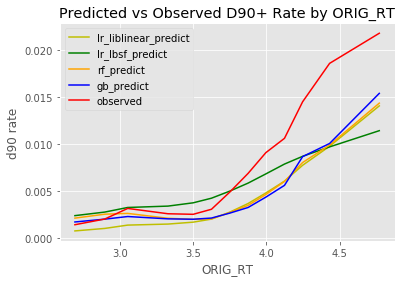

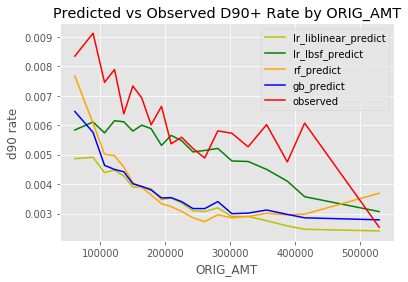

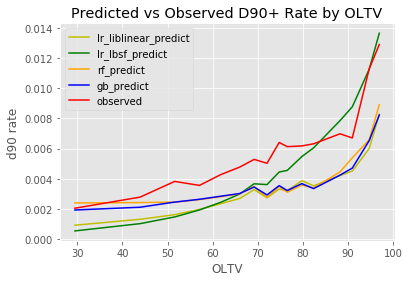

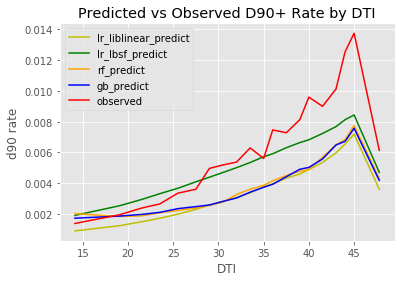

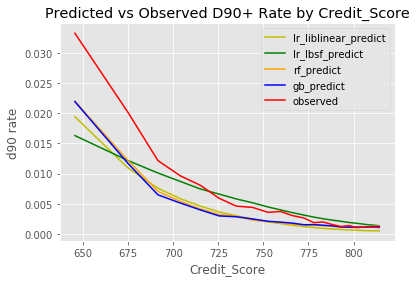

<Figure size 432x288 with 0 Axes>

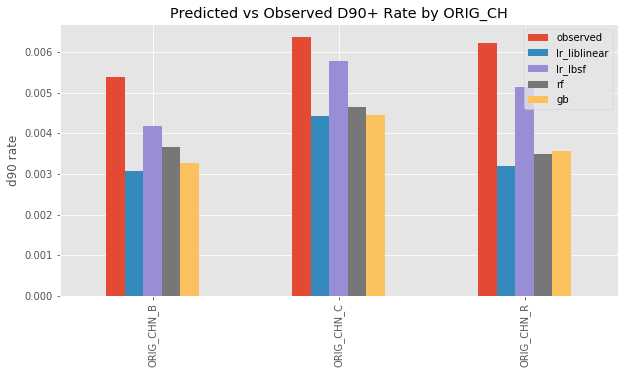

<Figure size 432x288 with 0 Axes>

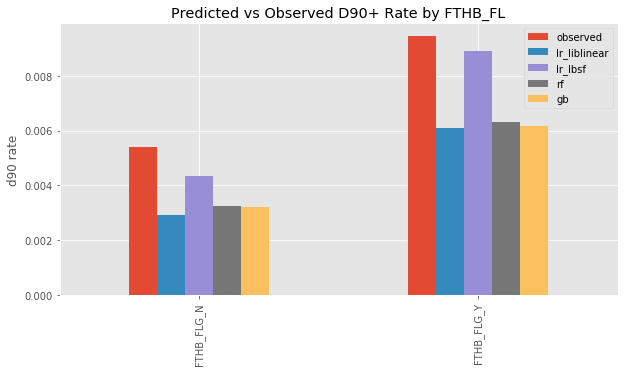

<Figure size 432x288 with 0 Axes>

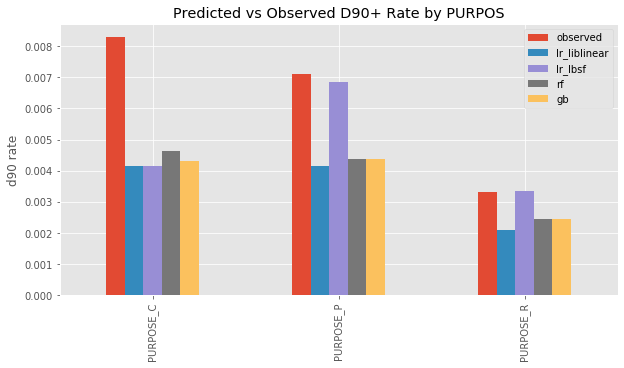

<Figure size 432x288 with 0 Axes>

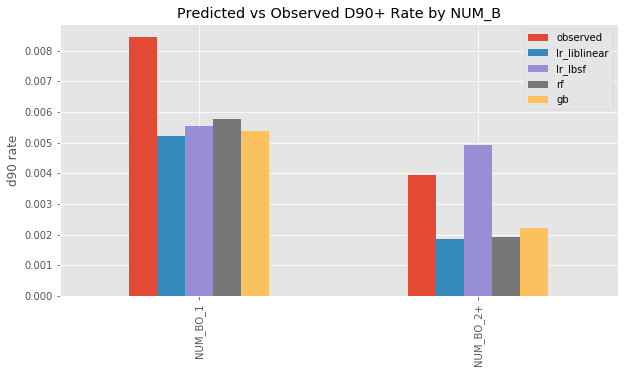

<Figure size 432x288 with 0 Axes>

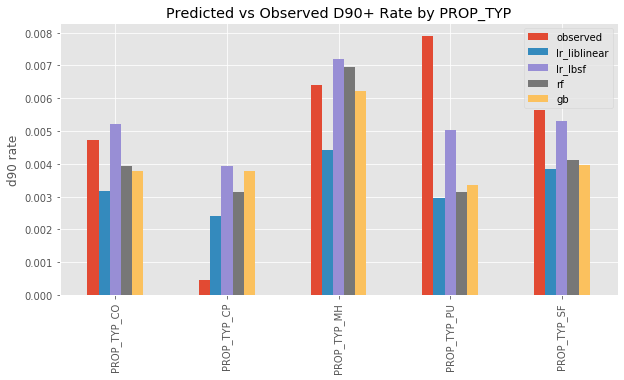

<Figure size 432x288 with 0 Axes>

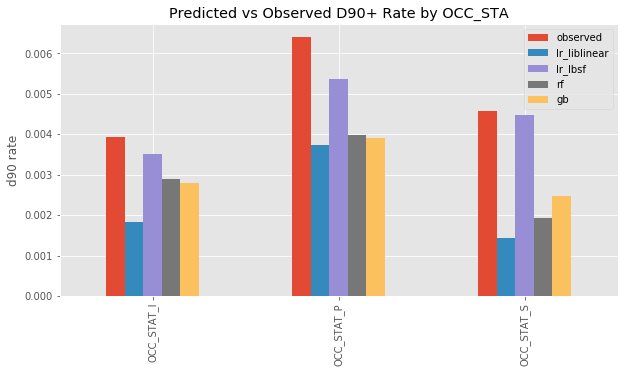

<Figure size 432x288 with 0 Axes>

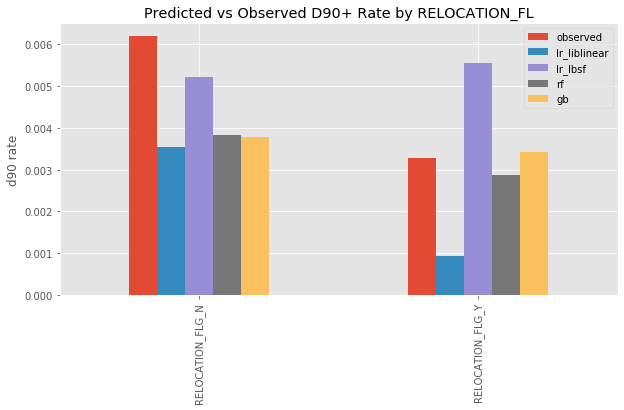

<Figure size 432x288 with 0 Axes>

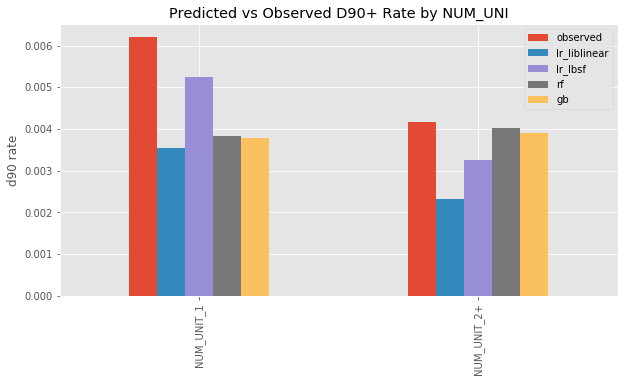

In [218]:
validation_1(df2016_new,2016)

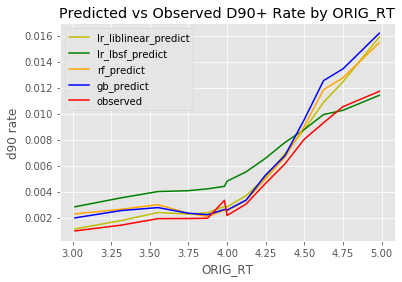

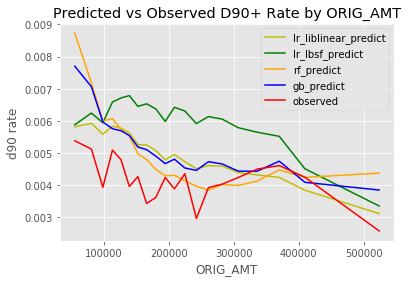

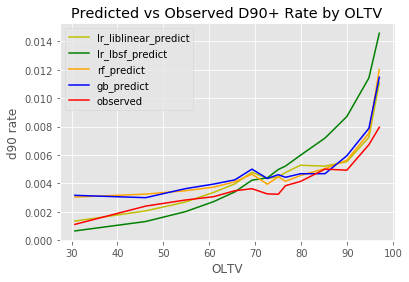

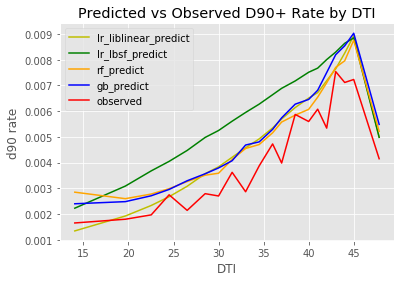

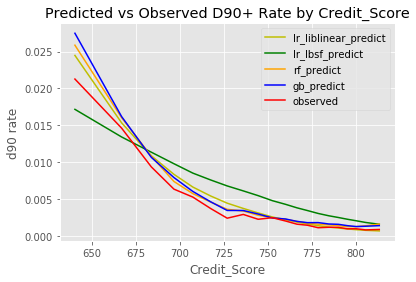

<Figure size 432x288 with 0 Axes>

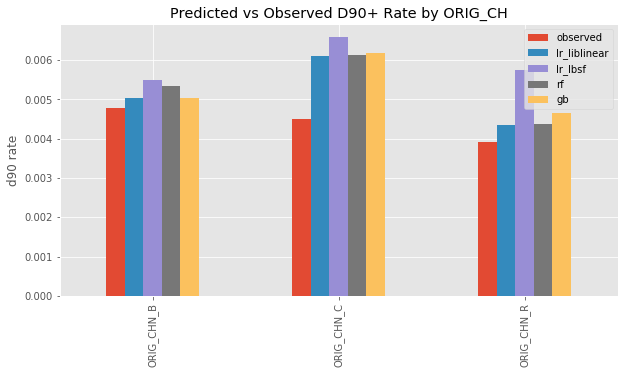

<Figure size 432x288 with 0 Axes>

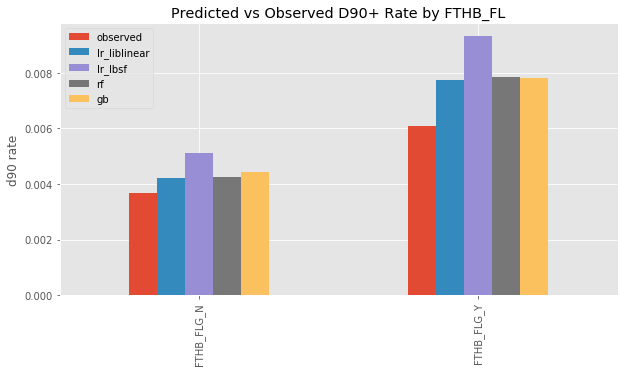

<Figure size 432x288 with 0 Axes>

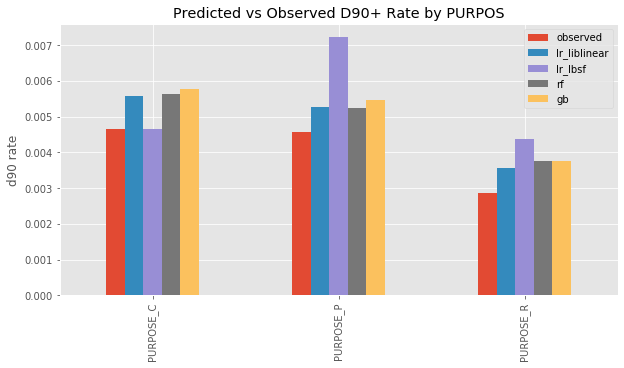

<Figure size 432x288 with 0 Axes>

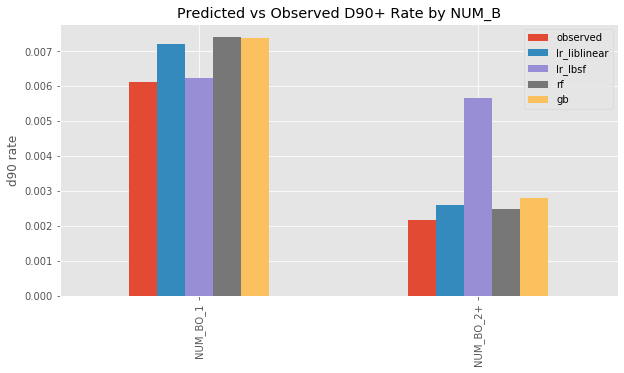

<Figure size 432x288 with 0 Axes>

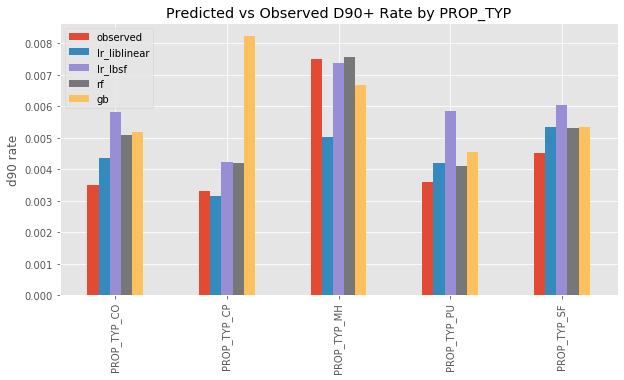

<Figure size 432x288 with 0 Axes>

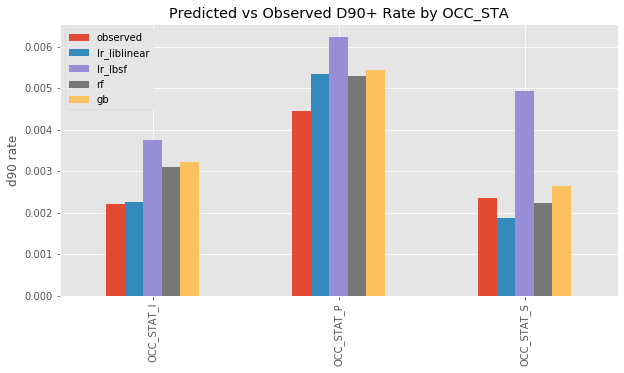

<Figure size 432x288 with 0 Axes>

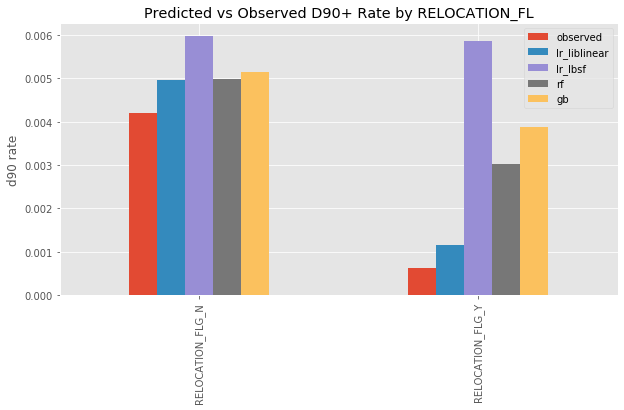

<Figure size 432x288 with 0 Axes>

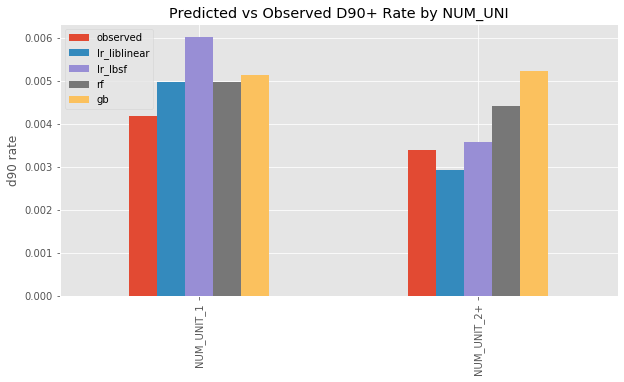

In [219]:
validation_1(df2015_new,2015)

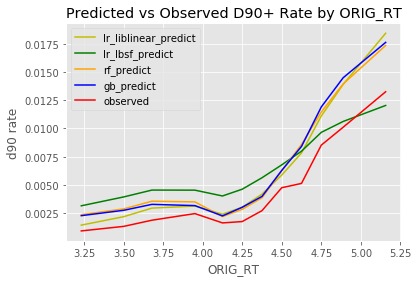

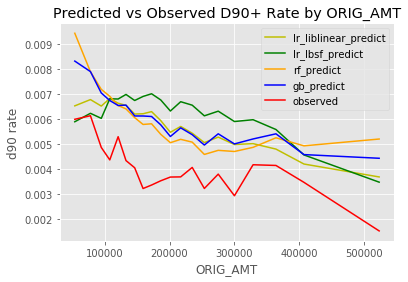

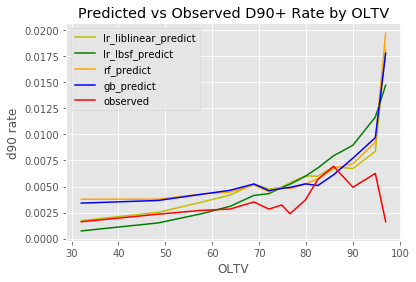

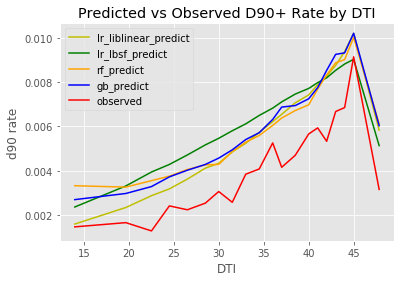

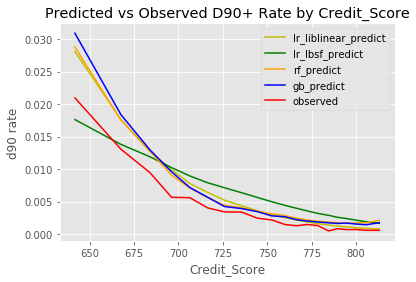

<Figure size 432x288 with 0 Axes>

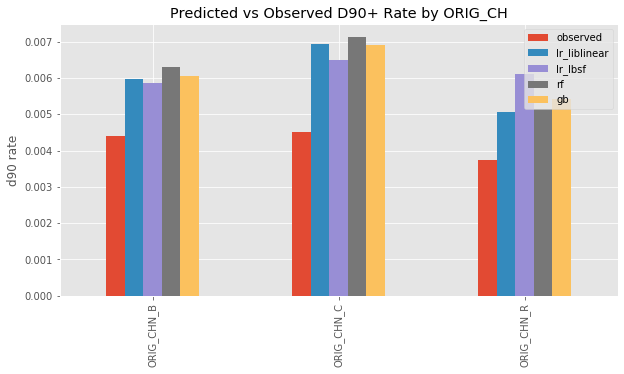

<Figure size 432x288 with 0 Axes>

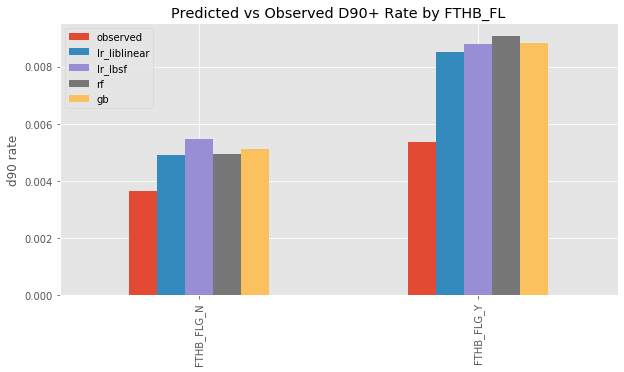

<Figure size 432x288 with 0 Axes>

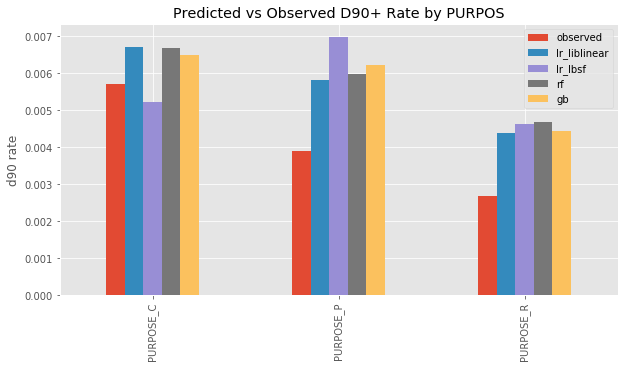

<Figure size 432x288 with 0 Axes>

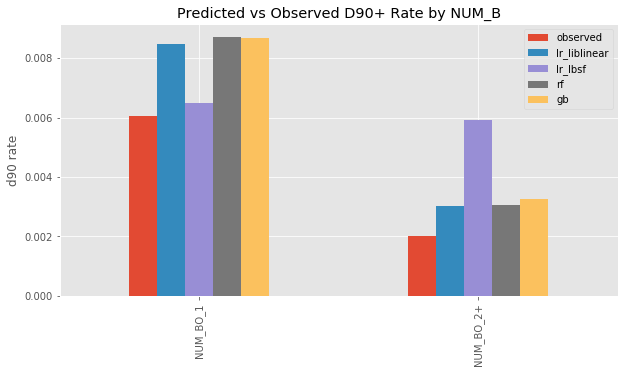

<Figure size 432x288 with 0 Axes>

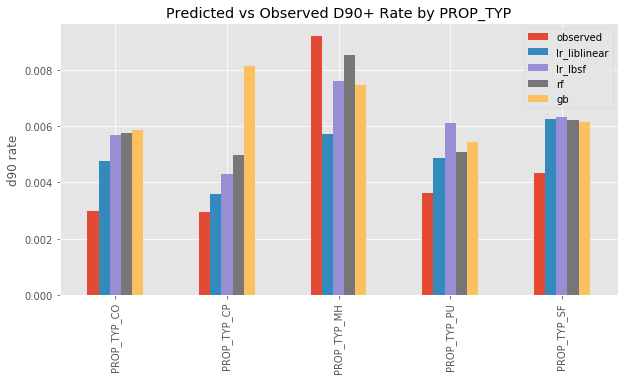

<Figure size 432x288 with 0 Axes>

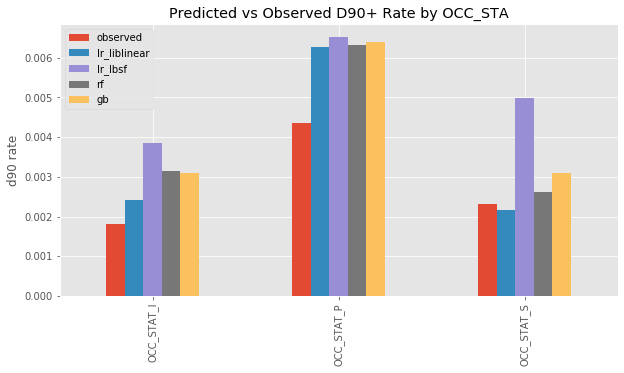

<Figure size 432x288 with 0 Axes>

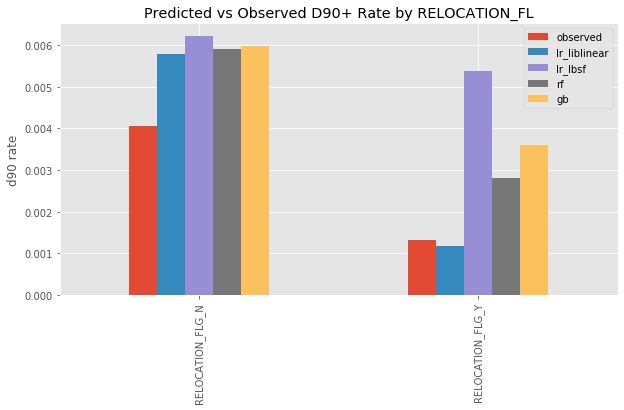

<Figure size 432x288 with 0 Axes>

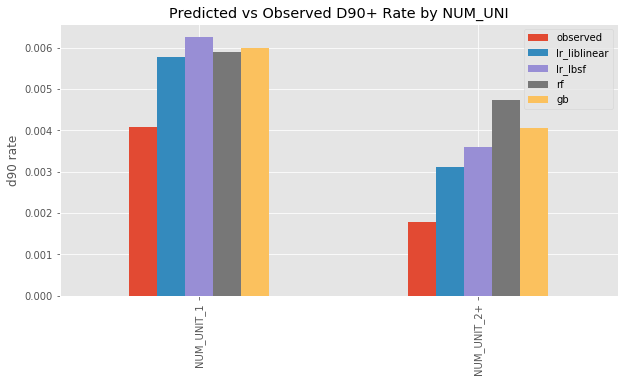

In [220]:
validation_1(df2014_new,2014)

In [213]:
def comparision(df):
    df.reset_index(inplace=True, drop = True)
    y = df['Delq.Status_D90']
    X = df.drop(columns = ['Delq.Status_D90'])

    # Below for loop iterates through your models list
    for name, model in model_list.items():
        a = X
    # Compute False postive rate, and True positive rate
        fpr, tpr, thresholds = metrics.roc_curve(y, model.predict_proba(a)[:,1])
    # Calculate Area under the curve to display on the plot
        auc = metrics.roc_auc_score(y,model.predict_proba(a)[:,1])
    # Now, plot the computed values
        plt.plot(fpr, tpr, label='%s ROC (area = %0.3f)' % (name, auc))
    # Custom settings for the plot 
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('1-Specificity(False Positive Rate)')
    plt.ylabel('Sensitivity(True Positive Rate)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()   # Display
    return 

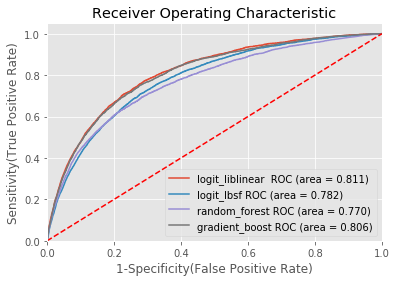

In [214]:
comparision(df2016_new)

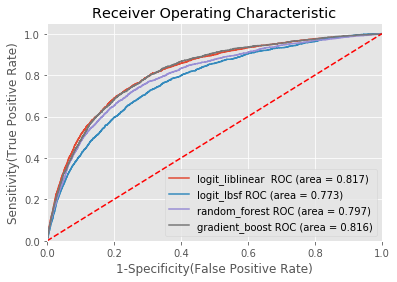

In [215]:
comparision(df2015_new)

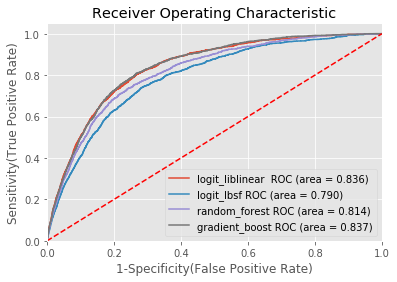

In [216]:
comparision(df2014_new)